# Proyecto Final de Gestión de Bases de Datos (SI424): Análisis de la Evolución de Graduados de la UPSA

Listado histórico de graduados de la UPSA (Gestiones 1988-2022).

Fuente de datos: [Graduados UPSA](https://www.upsa.edu.bo/es/graduados-upsa).

La extracción de datos se realiza con Excel mediante *importación de datos desde Internet*, lo cual genera 163 hojas de cálculo (gestión y facultad) en formato `.xlsx`.

El objetivo es primeramente consolidar, limpiar y normalizar los datos de inconsistencias y errores, siendo los nombres de las carreras. Posteriormente, se hará un mapping agregando una nueva columna de `Facultad`, indicando la facultad a la que pertenece cada carrera.

Entre los análisis a realizar, se encuentran:

- **Evolución de graduados en general**:
  - Año
  - Facultad
  - Carrera
- **Análisis del comportamiento a través del tiempo**:
  - Identificar si existe algún patrón de comportamiento, y si es posible predecir el número de graduados en general para los próximo años:
    - Carrera
    - Facultad
- **Indicadores estadísticos generales**:
  - Máximo
  - Mínimo
  - Media
  - Mediana
  - Etc.

## Librerías a usar

In [1]:
%pip install pandas matplotlib seaborn statsmodels numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de datos

`./Graduados de la UPSA.xlsx` contiene 163 hojas de cálculo, cada una con la información de graduados de una gestión y facultad específica. Este es el Excel resultante de la *importación de datos desde Internet*.

Consiguiente a la importación, se procede a unir todas las hojas en 1 solo Excel para el análisis. Como todas las hojas tiene la misma siguiente estructura:

- `Nombre`
- `Carrera`
- `Fecha Defensa`
- `Año`

In [ ]:
# Path to the Excel file with multiple sheets
graduates_excel_file_path = 'Graduados de la UPSA.xlsx'

def merge_excel_sheets(file_path: str) -> pd.DataFrame:
    # Read the Excel file with all sheets
    excel_workbook = pd.ExcelFile(file_path)

    # List to store DataFrames from each sheet
    combined_excel_sheets = []

    # Iterate through all sheets
    for sheet_name in excel_workbook.sheet_names:
        # Read each sheet, selecting only the first 4 columns
        sheet_data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=['Nombre', 'Carrera', 'Fecha Defensa', 'Año'])

        # Add a column to track the original sheet name if needed
        sheet_data['Sheet_Origin'] = sheet_name

        # Append to the list of DataFrames
        combined_excel_sheets.append(sheet_data)

    # Concatenate all DataFrames vertically
    return pd.concat(combined_excel_sheets, ignore_index=True)

# Merge the sheets
consolidated_graduate_data = merge_excel_sheets(graduates_excel_file_path)

# Optional: Display basic information about the merged DataFrame
print(f"Total number of records: {len(consolidated_graduate_data)}")
print("\nFirst few rows:")
print(consolidated_graduate_data.head())

# Save the merged DataFrame to a new Excel file
consolidated_graduate_data.to_excel('UPSA_Graduates_Consolidated.xlsx', index=False)

Total number of records: 10257

First few rows:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  COMUNICACION ESTRATEGICA Y CORPORATIVA   
1     ARIAS MEDINA SUSANA ESTHER  COMUNICACION ESTRATEGICA Y CORPORATIVA   
2      ROCA URIOSTE VANYA MÓNICA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
3  SANJINÉS ZACONETA PEGGY ERIKA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
4     CORTEZ UZEDA MARCO ANTONIO              ADMINISTRACION DE EMPRESAS   

  Fecha Defensa   Año Sheet_Origin  
0    1988-12-15  1988    Table 163  
1    1988-12-15  1988    Table 163  
2    1988-12-14  1988    Table 163  
3    1988-12-14  1988    Table 163  
4    1988-12-14  1988    Table 162  


### Unión de hojas de cálculo

Una vez finalizada la unión de todas las hojas de cálculo, se procede a la limpieza y normalización de los datos.

Entre los resultados obtenidos, se tiene un total de **10,257 registros de graduados**.

### Limpieza y normalización de datos

Ahora se procede a la limpieza y normalización de los datos, siendo el primer paso la normalización de los nombres de las carreras.

Primeramente se busca todos los valores únicos de la columna `Carrera` para identificar las inconsistencias y errores.

In [4]:
# Use the new Excel with the merged data for further analysis
consolidated_graduate_data = pd.read_excel('UPSA_Graduates_Consolidated.xlsx')
print("Consolidated data:")
print(consolidated_graduate_data.head())

# Print all values in the 'Carrera' column
unique_careers = consolidated_graduate_data['Carrera'].unique()
print("\n\nUnique career values:")
print("\n".join(sorted(unique_careers)))

Consolidated data:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  COMUNICACION ESTRATEGICA Y CORPORATIVA   
1     ARIAS MEDINA SUSANA ESTHER  COMUNICACION ESTRATEGICA Y CORPORATIVA   
2      ROCA URIOSTE VANYA MÓNICA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
3  SANJINÉS ZACONETA PEGGY ERIKA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
4     CORTEZ UZEDA MARCO ANTONIO              ADMINISTRACION DE EMPRESAS   

  Fecha Defensa   Año Sheet_Origin  
0    1988-12-15  1988    Table 163  
1    1988-12-15  1988    Table 163  
2    1988-12-14  1988    Table 163  
3    1988-12-14  1988    Table 163  
4    1988-12-14  1988    Table 162  


Unique career values:
ADMINISTRACION DE EMPRESAS
ADMINISTRACIÓN DE EMPRESAS
ANALISIS Y PROGRAMACION DE SISTEMAS
ARQUITECTURA
AUDITORIA Y FINANZAS
AUDITORÍA Y FINANZAS
Administración De Empresas
Arquitectura
Auditoria Y Finanzas
COMERCIO INTERNACIONAL
COMUNICACION ESTRATEGICA Y CORPORATIVA
COMUNICACI

In [5]:
import json

# Load the JSON file with the career categories
with open('./career_mapping.json', 'r', encoding='utf-8') as json_file:
    career_mapping = json.load(json_file)

# Clean the career names
def clean_career_names(df):
    df["Carrera"] = df["Carrera"].replace(career_mapping)

    return df


consolidated_graduate_data = clean_career_names(consolidated_graduate_data)

print("Unique values after cleaning:")
after_cleaning = consolidated_graduate_data["Carrera"].unique()
print("\n".join(sorted(after_cleaning)))

# Save the cleaned data to a new Excel file
consolidated_graduate_data.to_excel('UPSA_Graduates_Consolidated_Clean.xlsx', index=False)

Unique values after cleaning:
Administración De Empresas
Análisis Y Programación De Sistemas
Arquitectura
Auditoría Y Finanzas
Comercio Internacional
Comunicación Estratégica Y Corporativa
Construcciones
Contaduría General
Decoración De Interiores Y Paisajismo
Derecho
Diseño De Interiores
Diseño Gráfico
Diseño Gráfico Y Publicitario
Diseño Industrial
Diseño Y Gestión De La Moda
Ingeniería Civil
Ingeniería Comercial
Ingeniería De Petróleo Y Gas Natural
Ingeniería De Redes Y Telecomunicaciones
Ingeniería De Sistemas
Ingeniería Económica
Ingeniería Electrónica
Ingeniería Financiera
Ingeniería Industrial En Madera
Ingeniería Industrial Y De Sistemas
Ingeniería Informática Administrativa
Marketing Y Publicidad
Periodismo
Psicología


### Facultades

Una vez normalizados los nombres de las carreras, se procede a realizar un mapping de las carreras a las facultades a las que pertenecen.

In [ ]:
with open ('./faculty_mapping.json', 'r', encoding='utf-8') as json_file:
    faculties_mapping = json.load(json_file)

consolidated_graduate_data["Facultad"]=consolidated_graduate_data["Carrera"].map(faculties_mapping)

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(consolidated_graduate_data.head())

# Save the cleaned data to a new Excel file
consolidated_graduate_data.to_excel('UPSA_Graduates_Consolidated_Clean_Faculty.xlsx', index=False)

First few rows of the updated DataFrame:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  Comunicación Estratégica Y Corporativa   
1     ARIAS MEDINA SUSANA ESTHER  Comunicación Estratégica Y Corporativa   
2      ROCA URIOSTE VANYA MÓNICA  Comunicación Estratégica Y Corporativa   
3  SANJINÉS ZACONETA PEGGY ERIKA  Comunicación Estratégica Y Corporativa   
4     CORTEZ UZEDA MARCO ANTONIO              Administración De Empresas   

  Fecha Defensa   Año Sheet_Origin                             Facultad  
0    1988-12-15  1988    Table 163  Humanidades, Comunicaciones Y Artes  
1    1988-12-15  1988    Table 163  Humanidades, Comunicaciones Y Artes  
2    1988-12-14  1988    Table 163  Humanidades, Comunicaciones Y Artes  
3    1988-12-14  1988    Table 163  Humanidades, Comunicaciones Y Artes  
4    1988-12-14  1988    Table 162               Ciencias Empresariales  


## Análisis de los datos

### Evolución de graduados

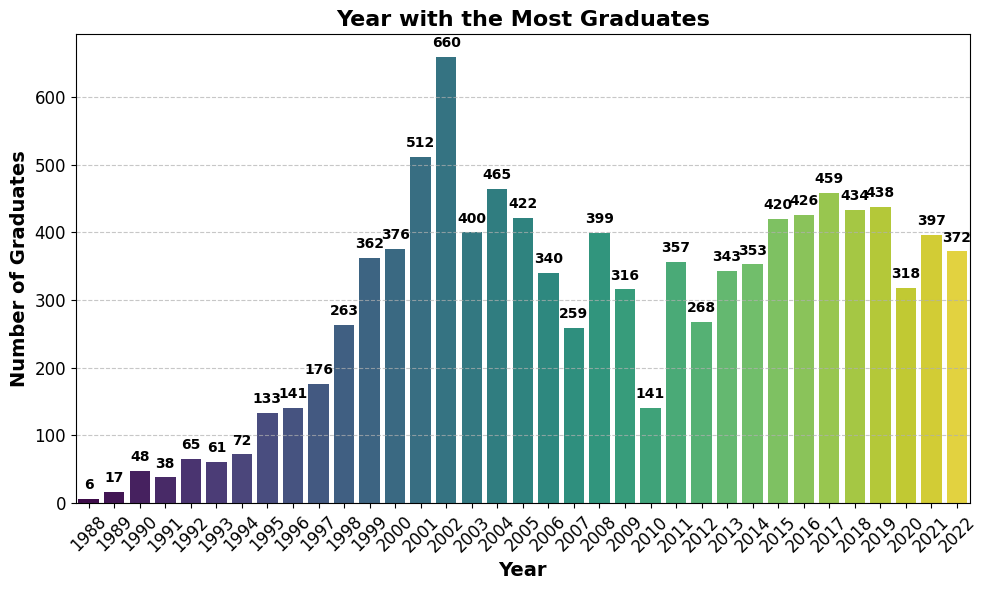

In [7]:
graduates_per_year = consolidated_graduate_data["Año"].value_counts().sort_index()

# Plot for the year with the most graduates
plt.figure(figsize=(10, 6))
sns.barplot(
    x=graduates_per_year.index,
    y=graduates_per_year.values,
    palette="viridis",
    hue=graduates_per_year.index,
    dodge=False,
    legend=False,
)

for index, value in enumerate(graduates_per_year.values):
    plt.text(
        index,
        value + 10,
        str(value),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.title("Year with the Most Graduates", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Graduates", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

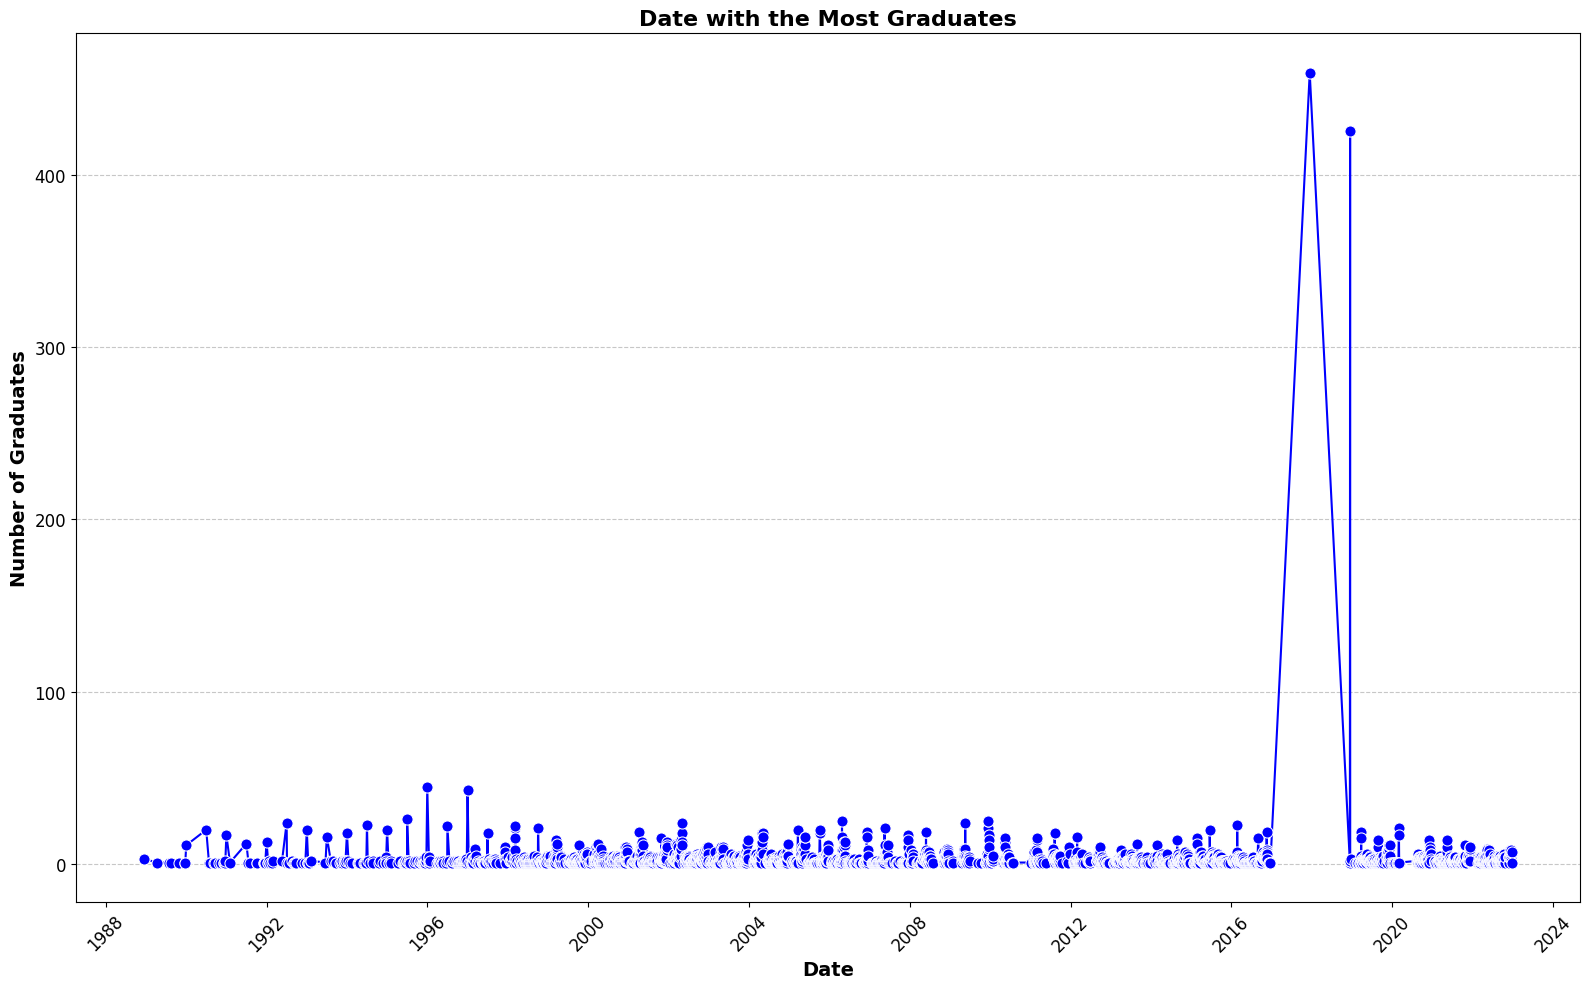

In [8]:
# Graduates per date
graduates_per_date = consolidated_graduate_data["Fecha Defensa"].dt.date.value_counts().sort_index()

# Plot for the date with the most graduates
plt.figure(figsize=(16, 10))
sns.lineplot(
    x=graduates_per_date.index,
    y=graduates_per_date.values,
    marker="o",
    markersize=8,
    color="blue",
)

plt.title("Date with the Most Graduates", fontsize=16, fontweight="bold")

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Number of Graduates", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

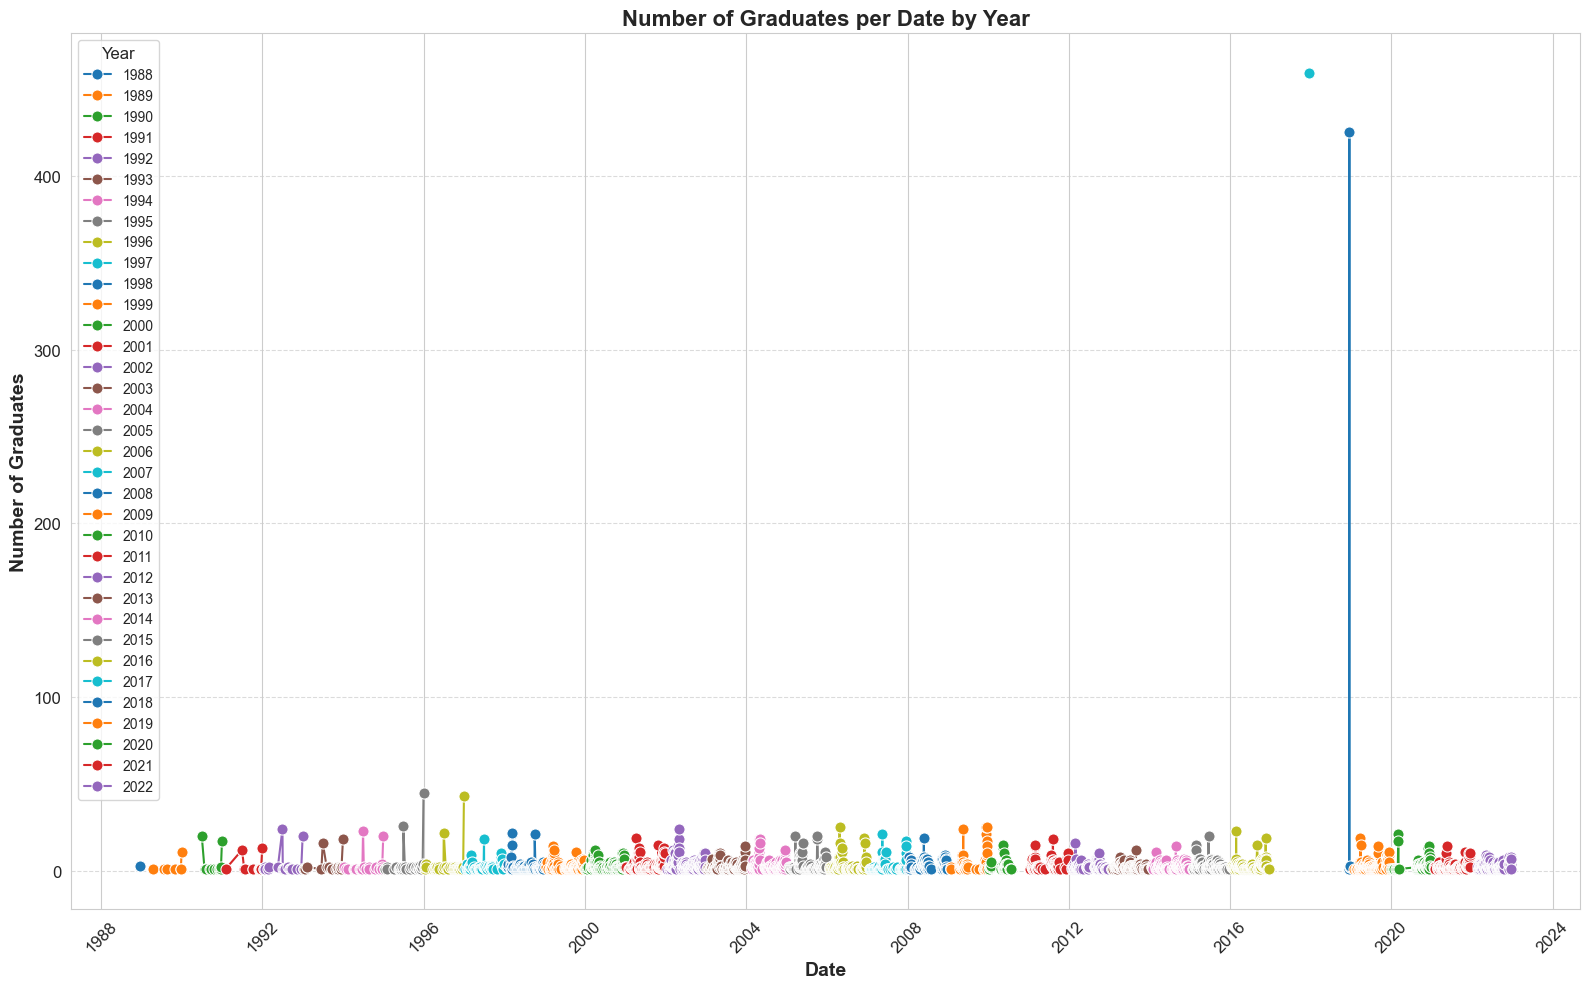

In [ ]:
# Graduates per date, but one plot per year
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
for year in consolidated_graduate_data["Año"].unique():
    graduates_per_date_year = consolidated_graduate_data[
        consolidated_graduate_data["Año"] == year
    ]["Fecha Defensa"].dt.date.value_counts().sort_index()

    sns.lineplot(
        x=graduates_per_date_year.index,
        y=graduates_per_date_year.values,
        marker="o",
        markersize=8,
        label=year,
    )

plt.title("Number of Graduates per Date by Year", fontsize=16, fontweight="bold")

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Number of Graduates", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Year", title_fontsize="12", fontsize="10", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

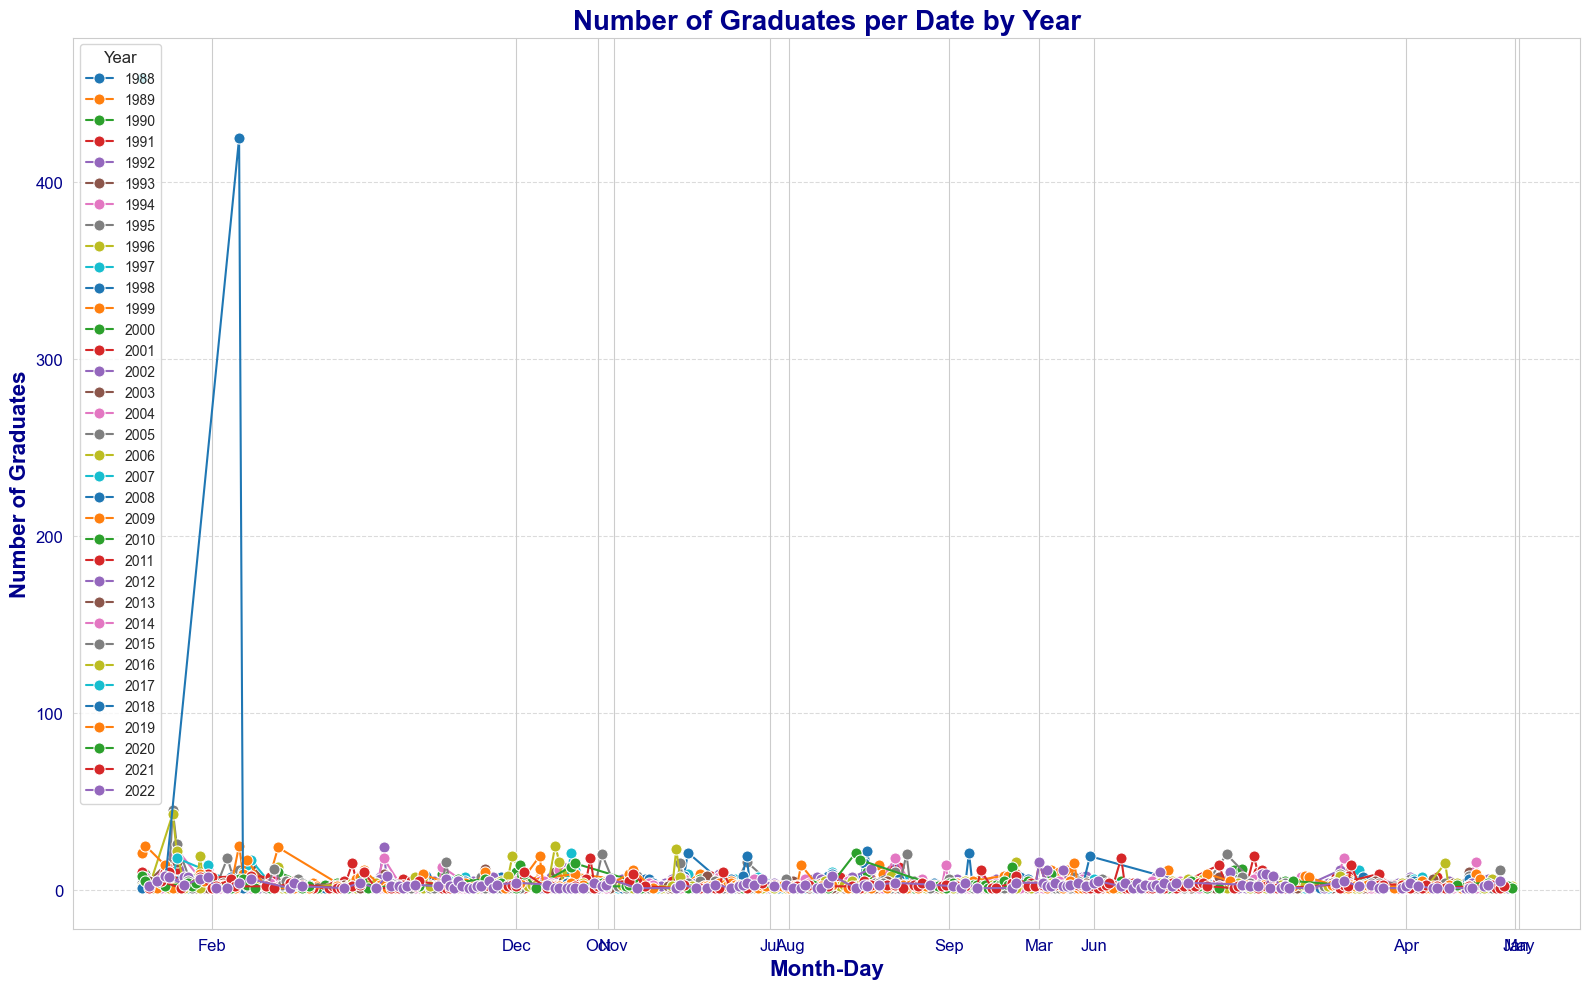

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming consolidated_graduate_data is already loaded and cleaned

# Set the style
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(16, 10))

# Iterate over each year and plot the number of graduates per month and day
for year in consolidated_graduate_data["Año"].unique():
    # Filter data for the specific year
    data_year = consolidated_graduate_data[consolidated_graduate_data["Año"] == year]

    # Aggregate the data by month and day
    graduates_per_month_day = data_year["Fecha Defensa"].dt.strftime('%m-%d').value_counts().sort_index()

    # Plot the data
    sns.lineplot(
        x=graduates_per_month_day.index,
        y=graduates_per_month_day.values,
        marker="o",
        markersize=8,
        label=year,
    )

# Customize the plot
plt.title("Number of Graduates per Date by Year", fontsize=20, fontweight="bold", color='darkblue')
plt.xlabel("Month-Day", fontsize=16, fontweight="bold", color='darkblue')
plt.ylabel("Number of Graduates", fontsize=16, fontweight="bold", color='darkblue')
plt.xticks(ticks=[f'{month:02d}-01' for month in range(1, 13)], labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.legend(title="Year", title_fontsize="12", fontsize="10", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

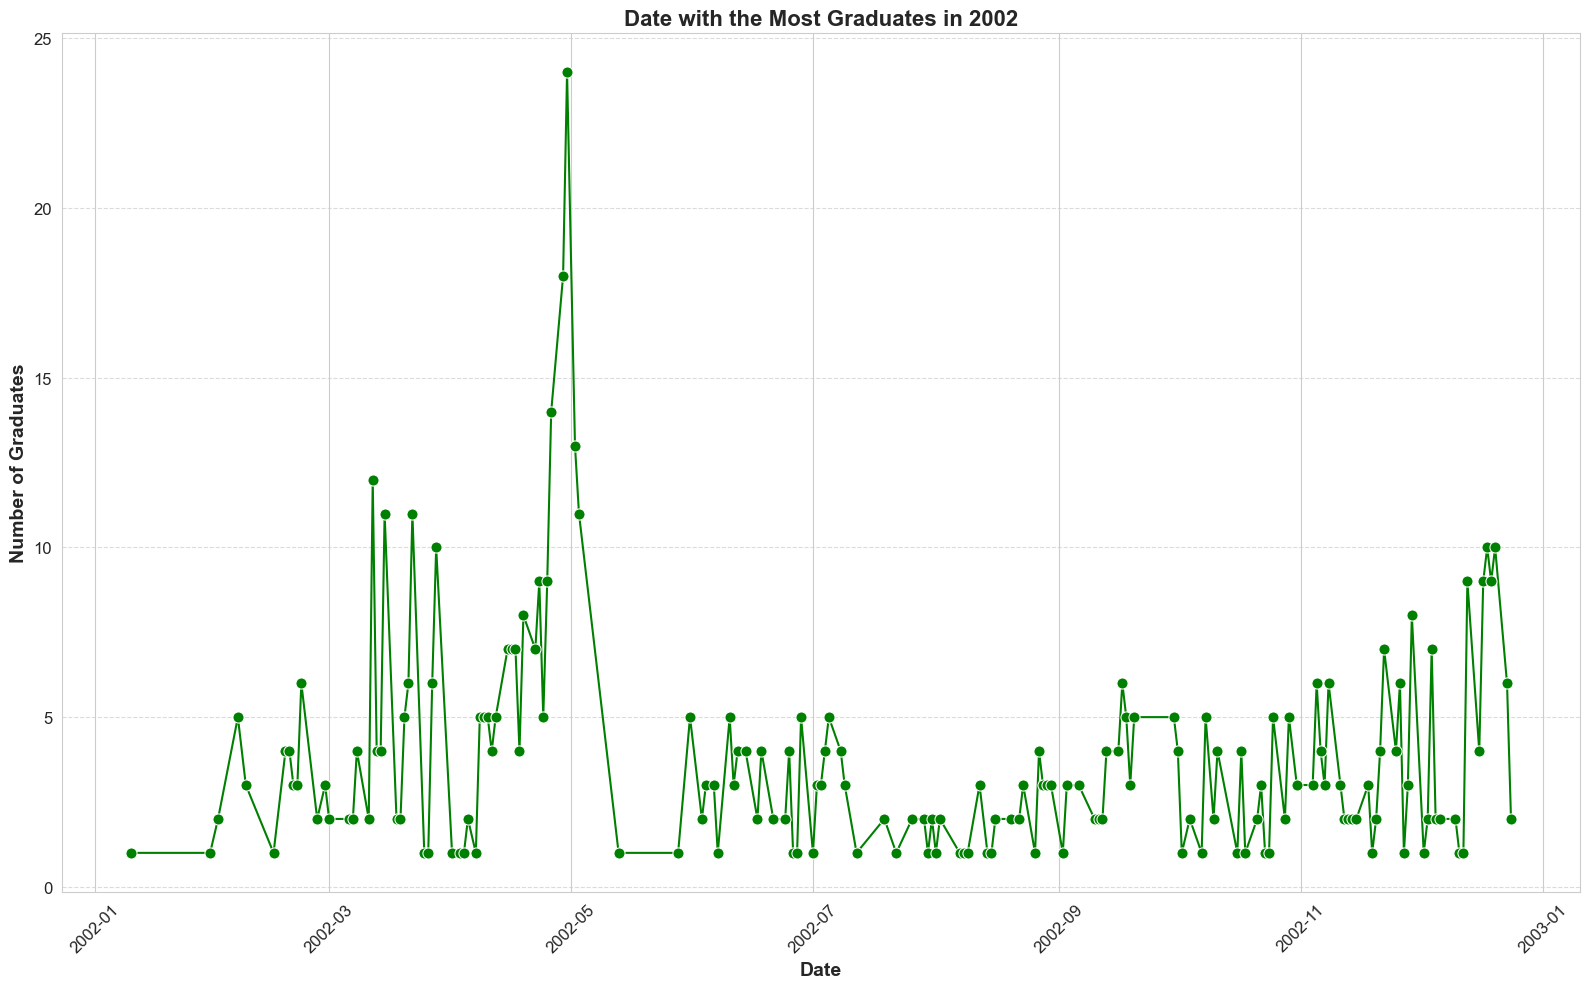

In [11]:
# Graduates per date for the year with the most graduates
year_with_most_graduates = graduates_per_year.idxmax()
graduates_per_date_most_graduates = consolidated_graduate_data[
    consolidated_graduate_data["Año"] == year_with_most_graduates
]["Fecha Defensa"].dt.date.value_counts().sort_index()

# Plot for the date with the most graduates
plt.figure(figsize=(16, 10))
sns.lineplot(
    x=graduates_per_date_most_graduates.index,
    y=graduates_per_date_most_graduates.values,
    marker="o",
    markersize=8,
    color="green",
)

plt.title(f"Date with the Most Graduates in {year_with_most_graduates}", fontsize=16, fontweight="bold")

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Number of Graduates", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

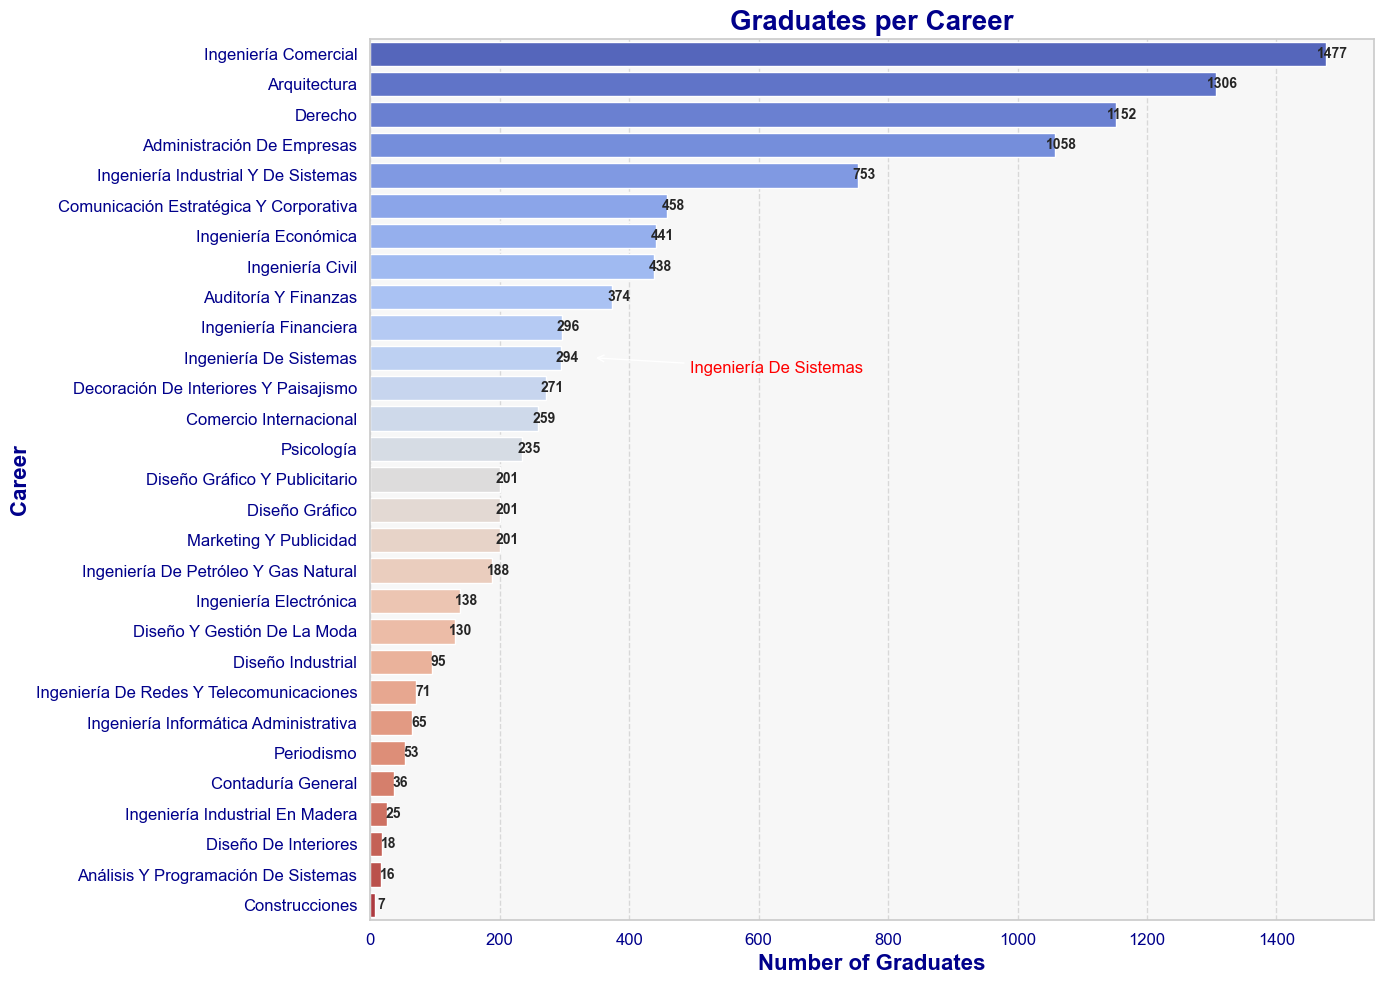

In [12]:
graduates_per_career = consolidated_graduate_data["Carrera"].value_counts().sort_values(ascending=False)

# Set the style
sns.set_theme(style="whitegrid")

# Plot for the graduates per career
plt.figure(figsize=(14, 10))
barplot = sns.barplot(y=graduates_per_career.index, x=graduates_per_career.values, palette="coolwarm", hue=graduates_per_career.index, dodge=False, legend=False)

# Add data labels
for index, value in enumerate(graduates_per_career.values):
    barplot.text(value + 10, index, str(value), ha='center', va='center', fontsize=10, fontweight='bold')

# Customize the plot
plt.title("Graduates per Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations for specific careers (optional)
highlight_careers = ["Ingeniería De Sistemas"]
for career in highlight_careers:
    if career in graduates_per_career.index:
        plt.annotate(f'{career}', xy=(graduates_per_career[career] + 50, graduates_per_career.index.get_loc(career)),
                     xytext=(graduates_per_career[career] + 200, graduates_per_career.index.get_loc(career) + 0.5),
                     arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red')

# Add a subtle background color
plt.gca().set_facecolor('#f7f7f7')

# Adjust layout
plt.tight_layout()
plt.show()

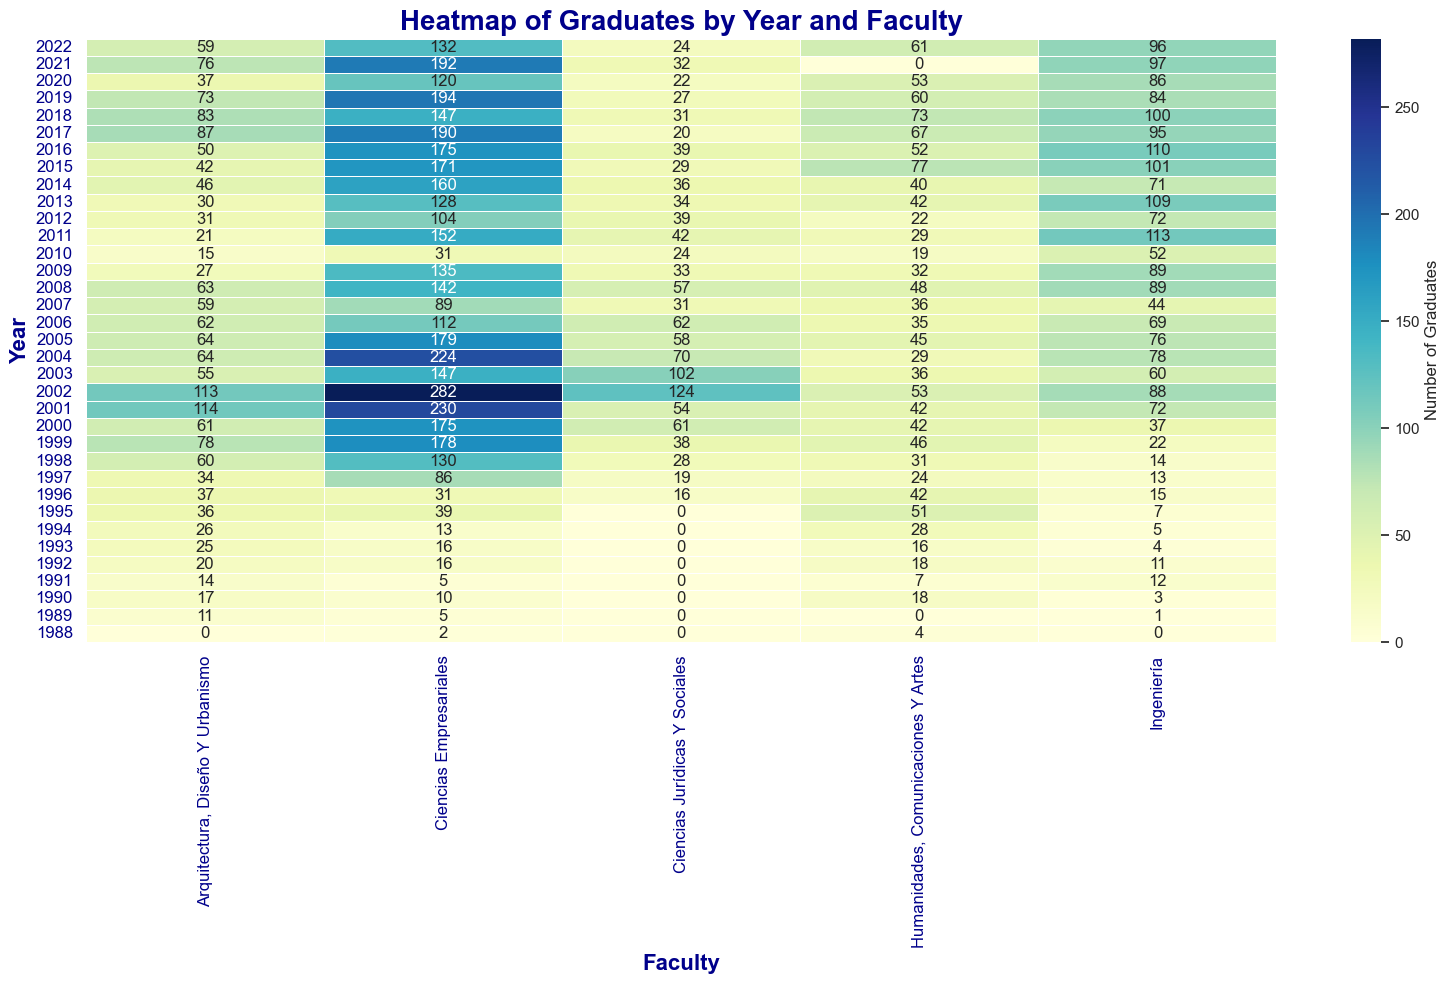

In [13]:
# Graduates by year and faculty
graduates_by_year_faculty = consolidated_graduate_data.pivot_table(index="Año", columns="Facultad", aggfunc="size", fill_value=0)
graduates_by_year_faculty = graduates_by_year_faculty.iloc[::-1]

# Plot for graduates by year and faculty
plt.figure(figsize=(16, 10))
sns.heatmap(graduates_by_year_faculty, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Graduates'})

plt.title("Heatmap of Graduates by Year and Faculty", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Faculty", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()

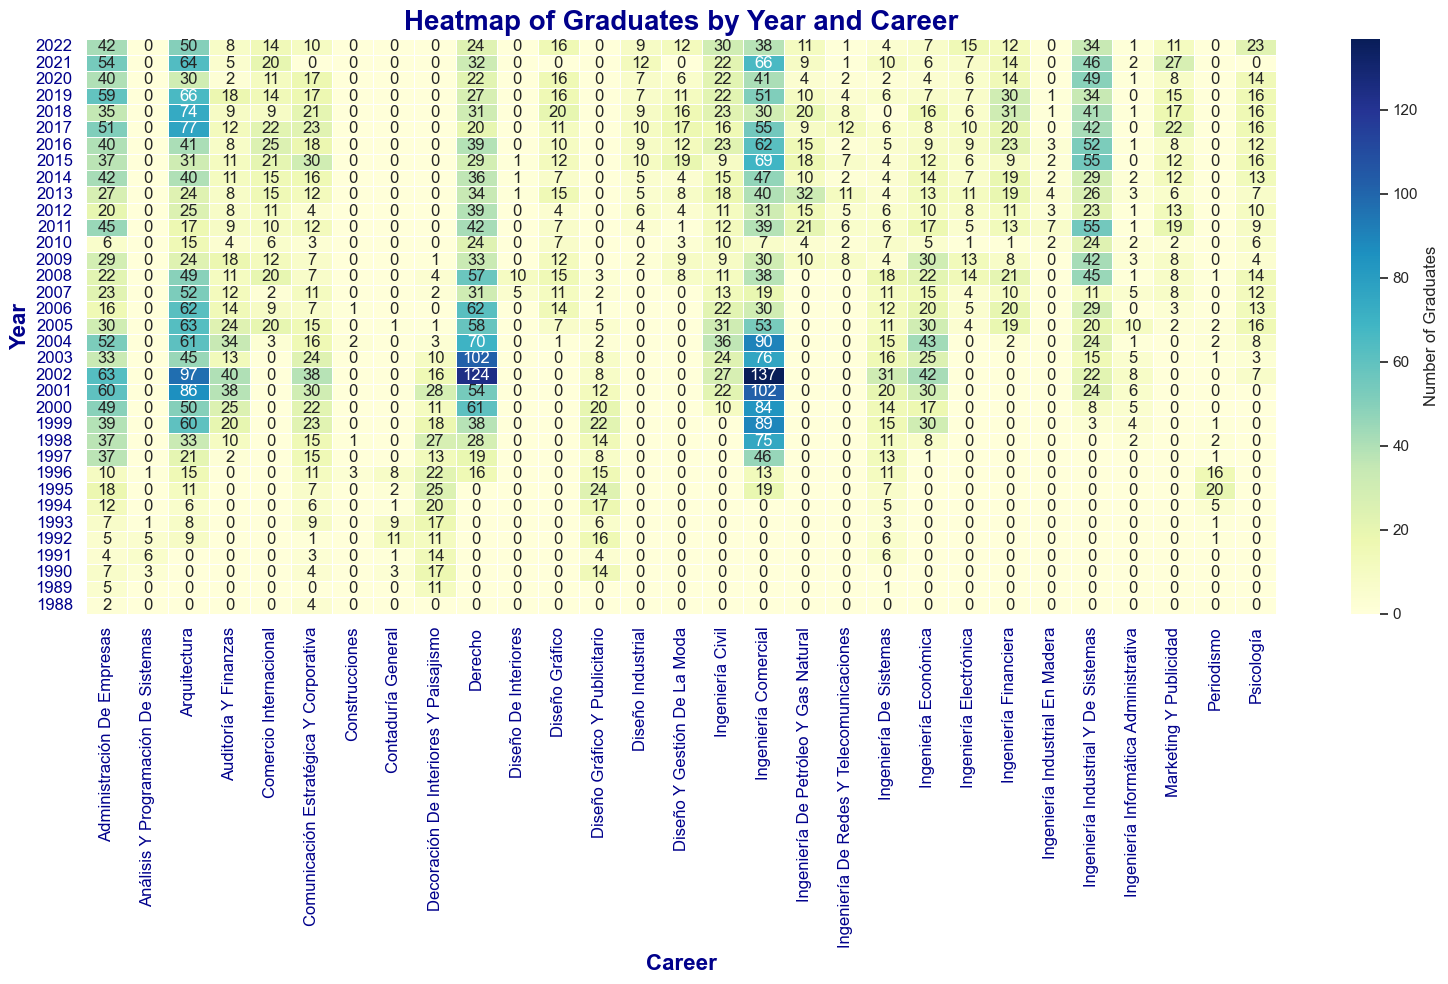

In [14]:
# Graduates by year and career
graduates_by_year_career = consolidated_graduate_data.pivot_table(index="Año", columns="Carrera", aggfunc="size", fill_value=0)
graduates_by_year_career = graduates_by_year_career.iloc[::-1]

# Plot for graduates by year and career
plt.figure(figsize=(16, 10))
sns.heatmap(graduates_by_year_career, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Graduates'})


plt.title("Heatmap of Graduates by Year and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()

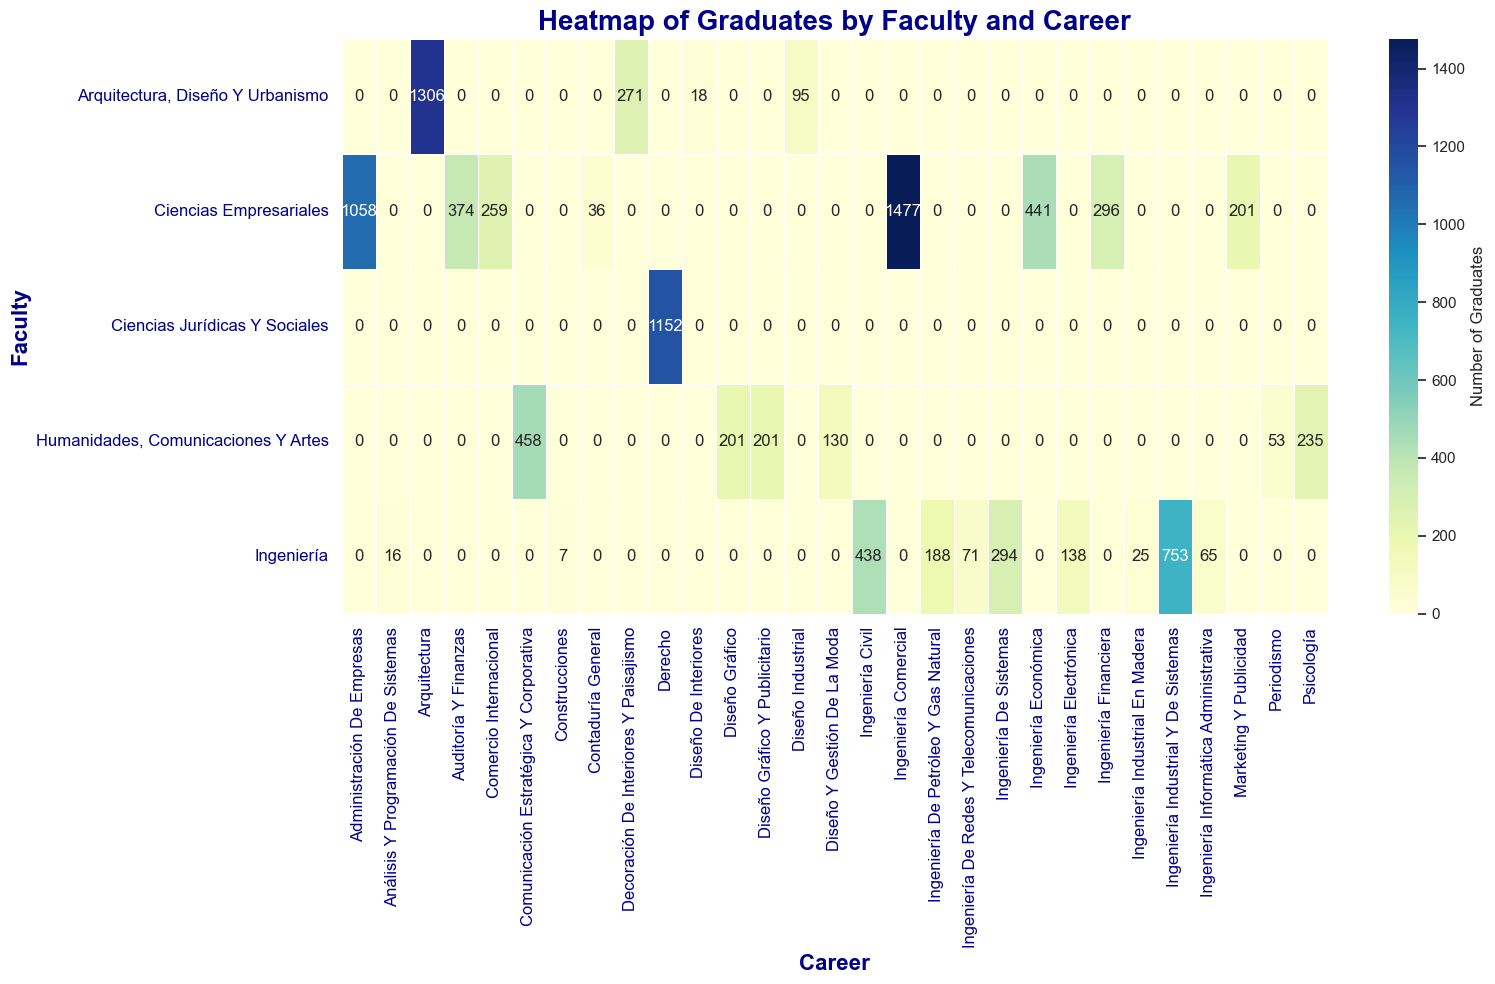

In [15]:
# Graduates by faculty and career
graduates_by_faculty_career = consolidated_graduate_data.pivot_table(index="Facultad", columns="Carrera", aggfunc="size", fill_value=0)

# Plot for graduates by faculty and career
plt.figure(figsize=(16, 10))
sns.heatmap(graduates_by_faculty_career, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Graduates'})

plt.title("Heatmap of Graduates by Faculty and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Faculty", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()

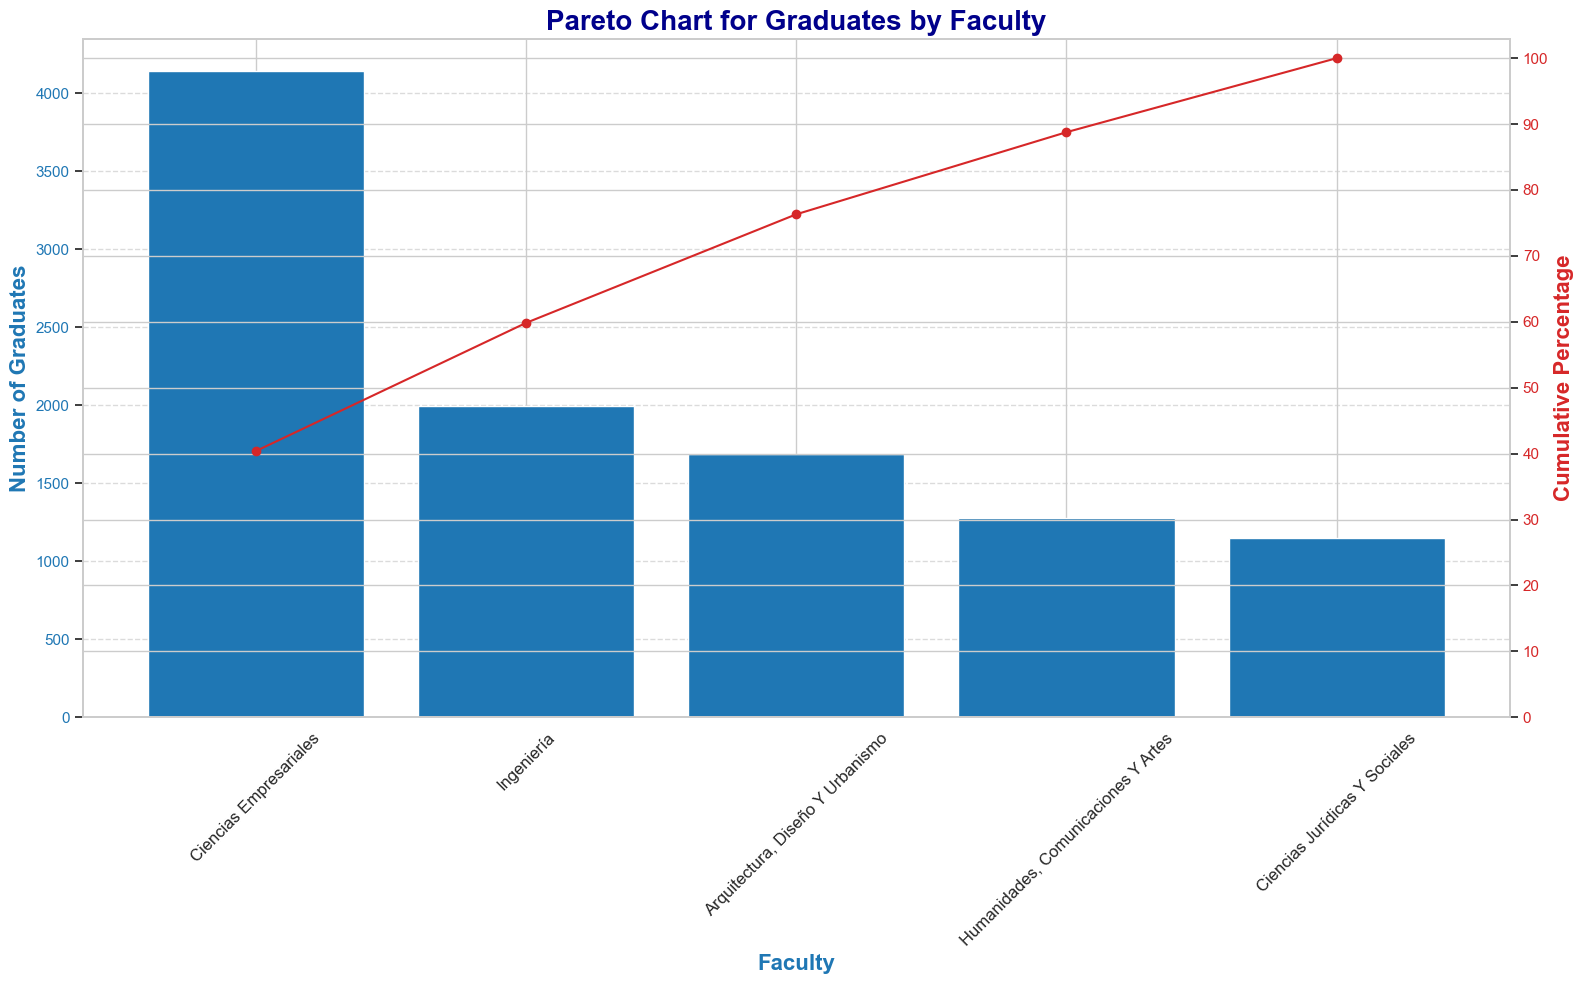

In [16]:
# Pareto chart for faculties
faculty_graduates = consolidated_graduate_data["Facultad"].value_counts()
faculty_graduates_percentage = faculty_graduates / faculty_graduates.sum() * 100
faculty_graduates_cumulative_percentage = faculty_graduates_percentage.cumsum()

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 10))

color = 'tab:blue'
ax1.bar(faculty_graduates.index, faculty_graduates.values, color=color)
ax1.set_xlabel('Faculty', fontsize=16, fontweight='bold', color=color)
ax1.set_ylabel('Number of Graduates', fontsize=16, fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(faculty_graduates.index)))
ax1.set_xticklabels(faculty_graduates.index, rotation=45, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(faculty_graduates_cumulative_percentage, marker='o', color=color)
ax2.set_ylabel('Cumulative Percentage', fontsize=16, fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(range(0, 101, 10))

plt.title("Pareto Chart for Graduates by Faculty", fontsize=20, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()

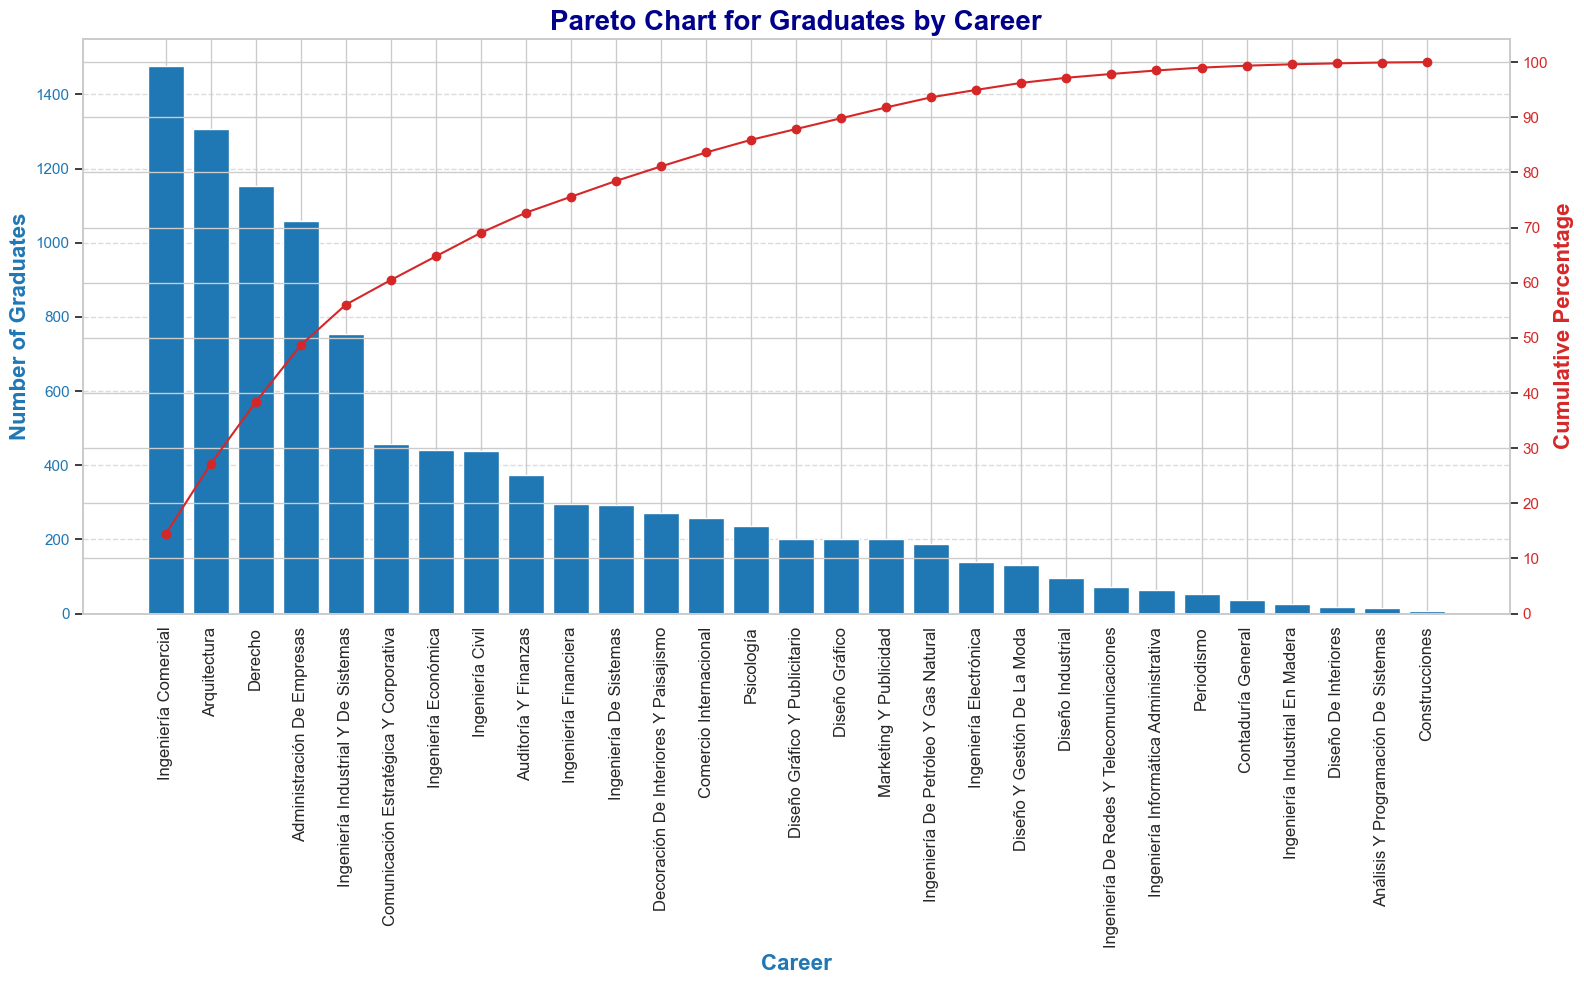

In [17]:
# Pareto chart for careers
career_graduates = consolidated_graduate_data["Carrera"].value_counts()
career_graduates_percentage = career_graduates / career_graduates.sum() * 100
career_graduates_cumulative_percentage = career_graduates_percentage.cumsum()

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 10))

color = 'tab:blue'
ax1.bar(career_graduates.index, career_graduates.values, color=color)
ax1.set_xlabel('Career', fontsize=16, fontweight='bold', color=color)
ax1.set_ylabel('Number of Graduates', fontsize=16, fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(career_graduates.index)))
ax1.set_xticklabels(career_graduates.index, rotation=90, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(career_graduates_cumulative_percentage, marker='o', color=color)
ax2.set_ylabel('Cumulative Percentage', fontsize=16, fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(range(0, 101, 10))

plt.title("Pareto Chart for Graduates by Career", fontsize=20, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()

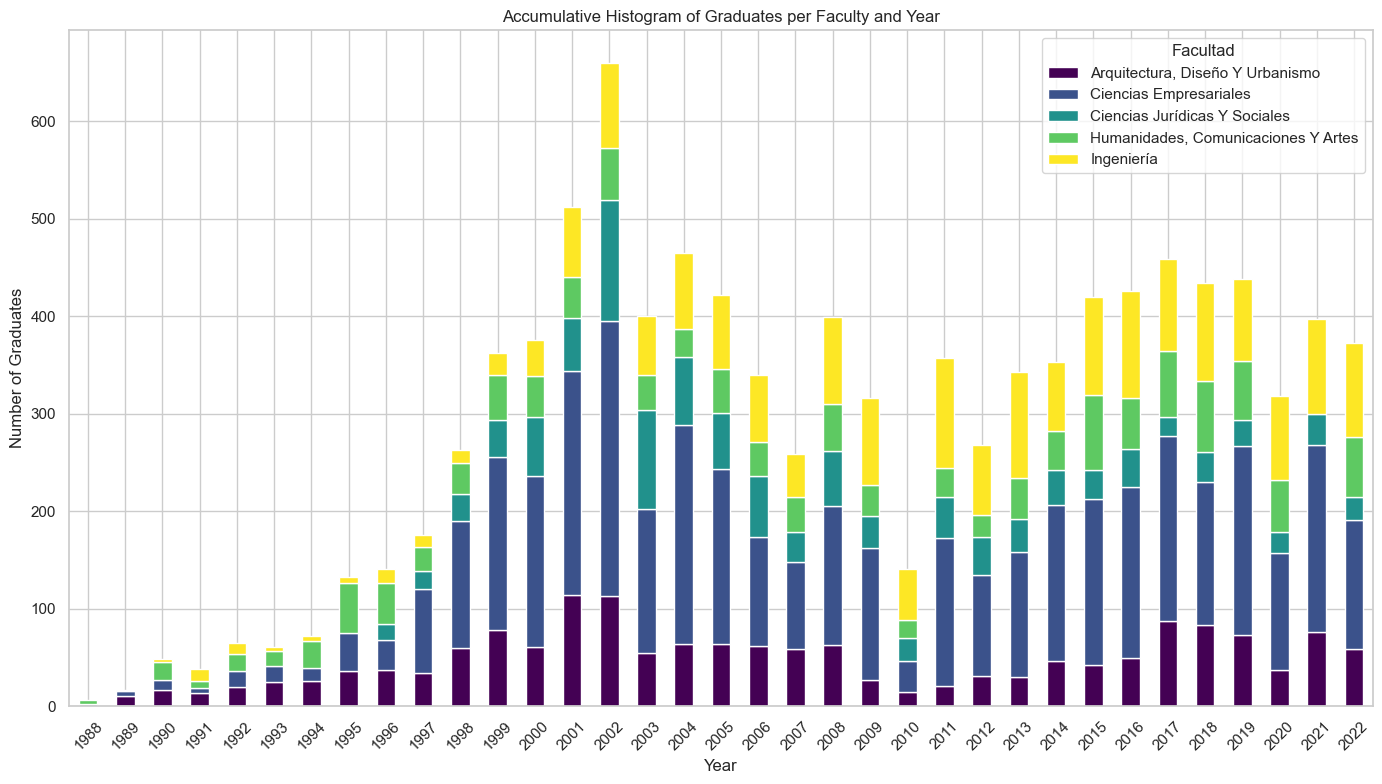

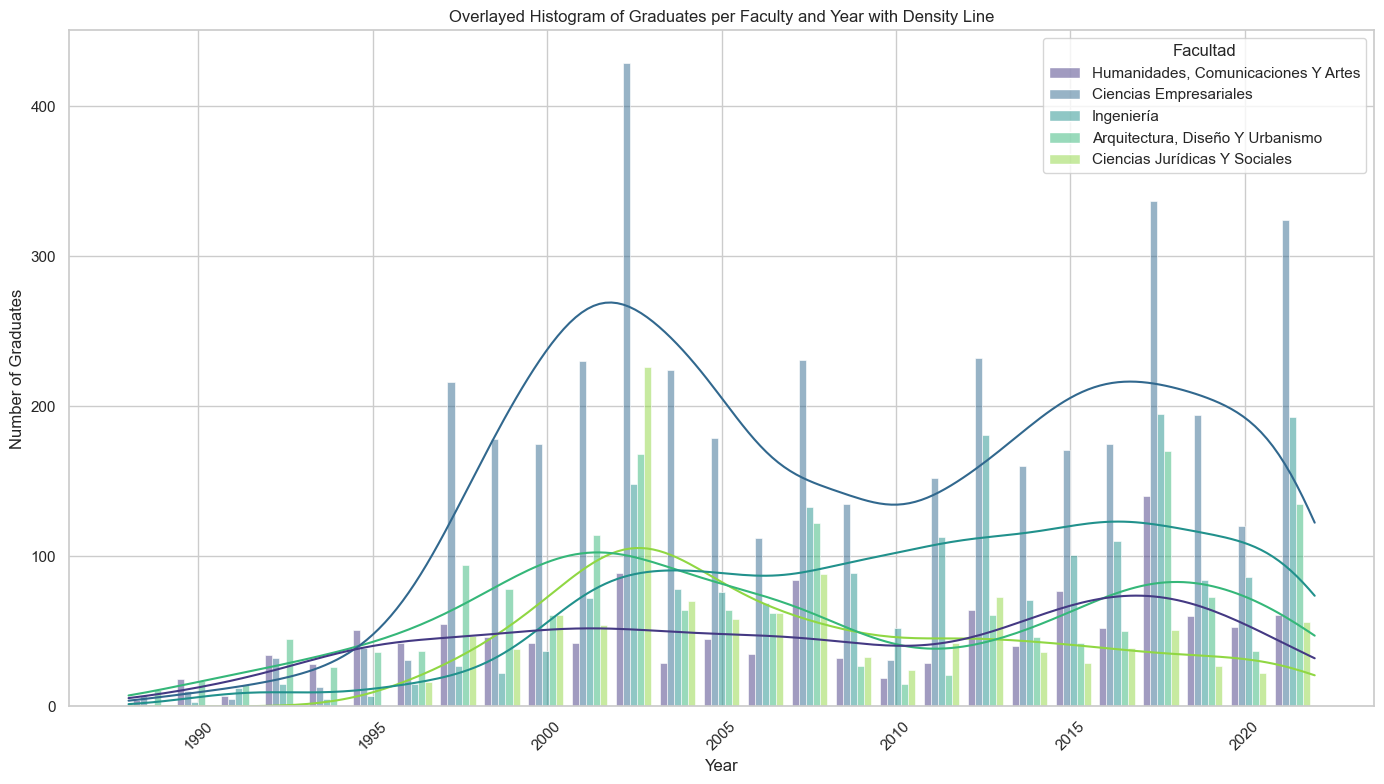

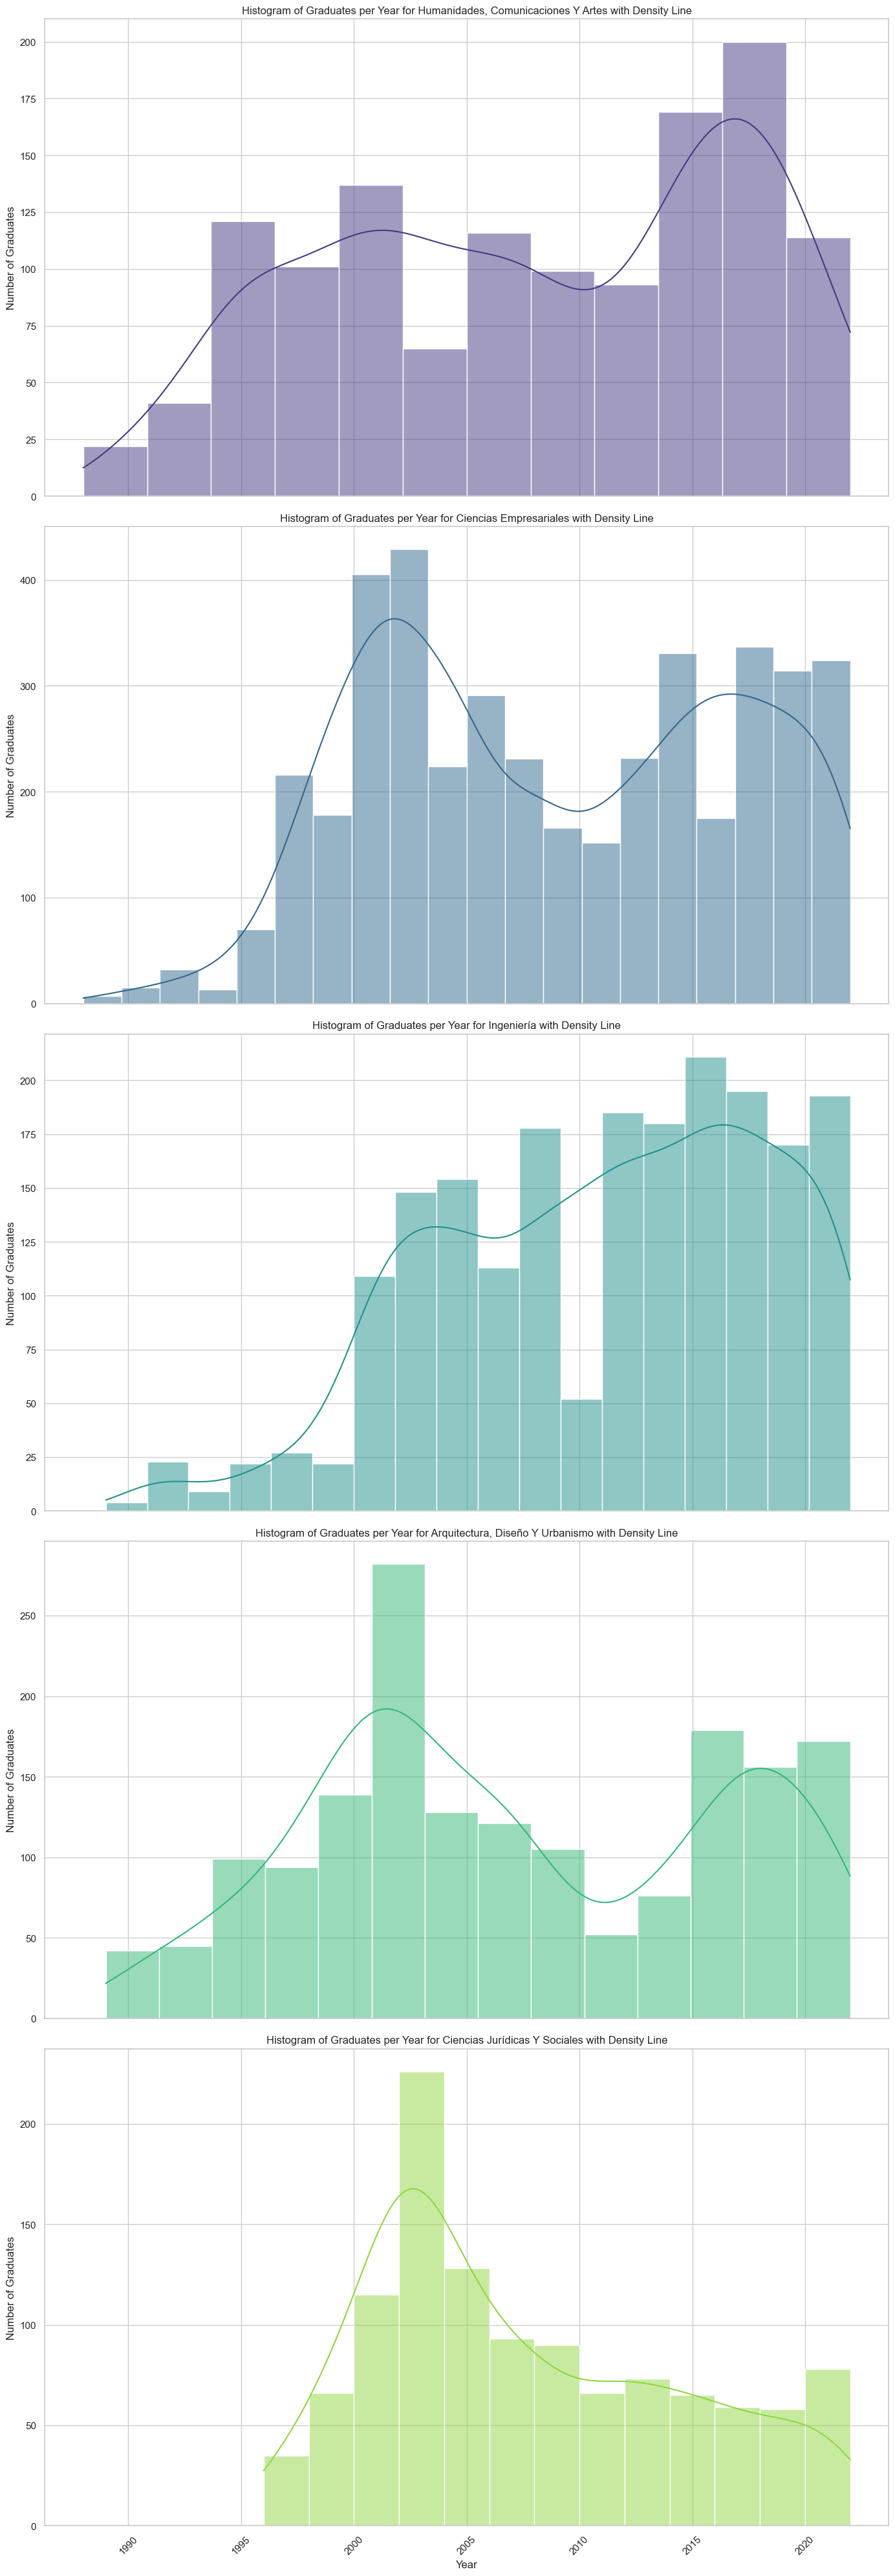

In [18]:
# Histogram of graduates per faculty and year with density lines

# Accumulative histogram bars with density line
plt.figure(figsize=(14, 8))
consolidated_graduate_data.groupby(['Año', 'Facultad']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Accumulative Histogram of Graduates per Faculty and Year")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Faculties overlayed with density line
plt.figure(figsize=(14, 8))
sns.histplot(data=consolidated_graduate_data, x="Año", hue="Facultad", multiple="dodge", palette="viridis", shrink=0.8, kde=True)
plt.title("Overlayed Histogram of Graduates per Faculty and Year with Density Line")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Separate histogram for each faculty with density line
faculties = consolidated_graduate_data["Facultad"].unique()
num_faculties = len(faculties)
fig, axes = plt.subplots(num_faculties, 1, figsize=(14, 8 * num_faculties), sharex=True)

for i, faculty in enumerate(faculties):
    sns.histplot(data=consolidated_graduate_data[consolidated_graduate_data["Facultad"] == faculty], x="Año", ax=axes[i], color=sns.color_palette("viridis", num_faculties)[i], kde=True)
    axes[i].set_title(f"Histogram of Graduates per Year for {faculty} with Density Line")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Graduates")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Análisis del comportamiento a través del tiempo

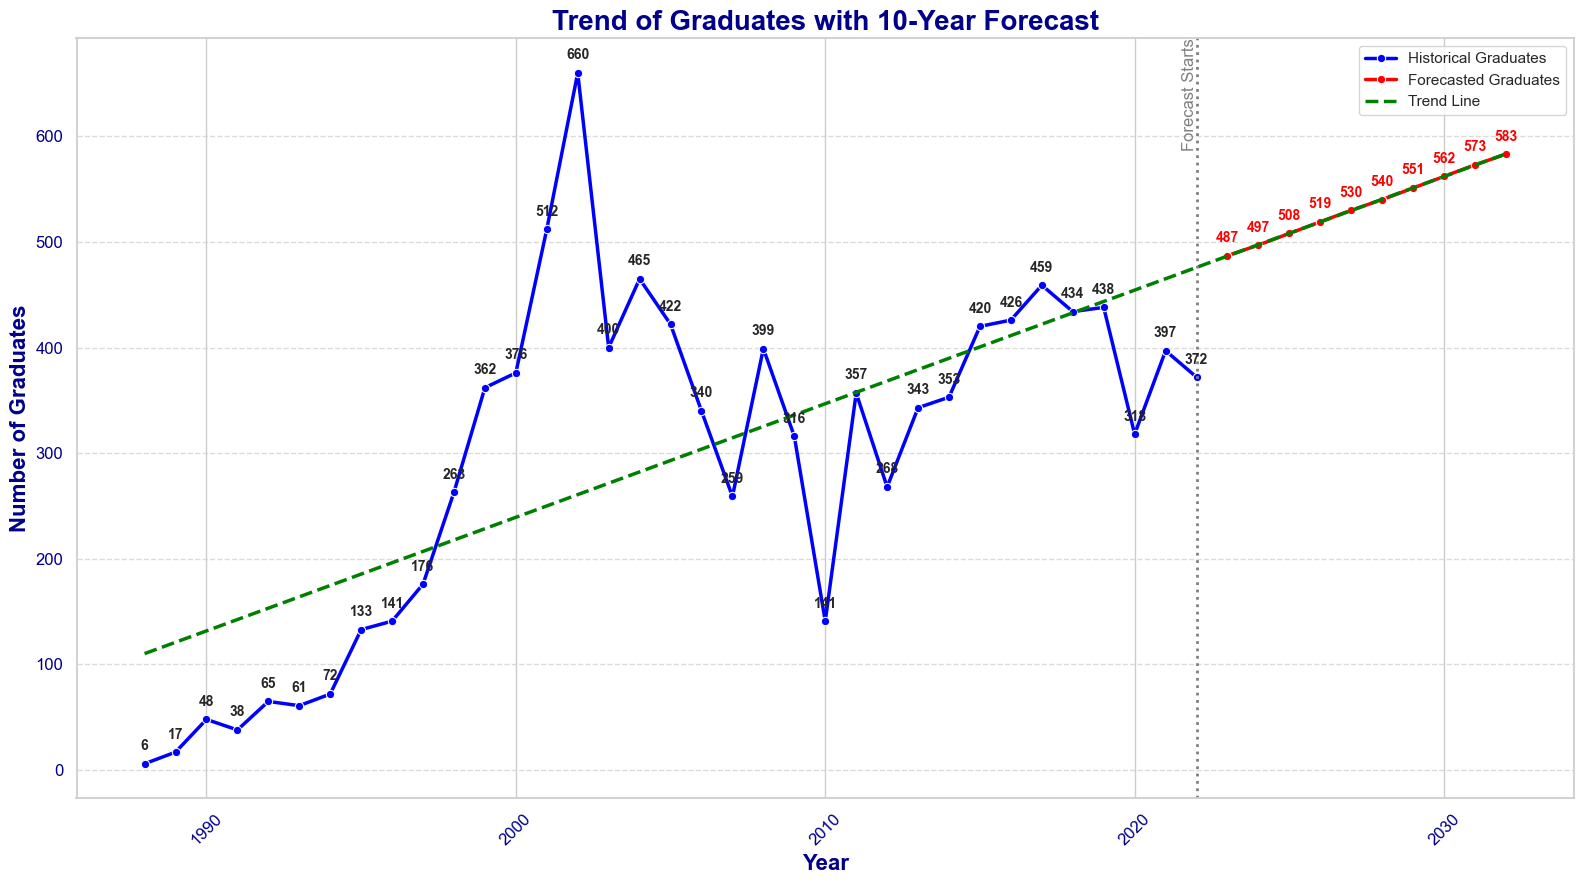

Año  Count  Forecast
0   1988      6     False
1   1989     17     False
2   1990     48     False
3   1991     38     False
4   1992     65     False
5   1993     61     False
6   1994     72     False
7   1995    133     False
8   1996    141     False
9   1997    176     False
10  1998    263     False
11  1999    362     False
12  2000    376     False
13  2001    512     False
14  2002    660     False
15  2003    400     False
16  2004    465     False
17  2005    422     False
18  2006    340     False
19  2007    259     False
20  2008    399     False
21  2009    316     False
22  2010    141     False
23  2011    357     False
24  2012    268     False
25  2013    343     False
26  2014    353     False
27  2015    420     False
28  2016    426     False
29  2017    459     False
30  2018    434     False
31  2019    438     False
32  2020    318     False
33  2021    397     False
34  2022    372     False
0   2023    487      True
1   2024    497      True
2   2025    508      True
3   2026    519      True
4   2027    530      True
5   2028    540      True
6   2029    551      True
7   2030    562      True
8   2031    573      True
9   2032    583      True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def forecast_graduates(graduates_per_year):
    """
    Forecast graduates for the next 10 years using linear regression

    Parameters:
    graduates_per_year (pandas.DataFrame): DataFrame with 'Año' and 'Count' columns

    Returns:
    pandas.DataFrame: Forecast for next 10 years
    """
    # Prepare data for linear regression
    X = graduates_per_year['Año'].values.reshape(-1, 1)
    y = graduates_per_year['Count'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate forecast years
    last_year = graduates_per_year['Año'].max()
    forecast_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)

    # Predict graduates for forecast years
    forecast_counts = model.predict(forecast_years)

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'Año': forecast_years.flatten(),
        'Count': np.round(forecast_counts).astype(int),
        'Forecast': True
    })

    # Combine historical and forecast data
    full_data = pd.concat([
        graduates_per_year.assign(Forecast=False),
        forecast_df
    ]).sort_values('Año')

    return full_data, model

def plot_graduates_with_forecast(full_data, model):
    """
    Plot graduates trend with forecast

    Parameters:
    full_data (pandas.DataFrame): Combined historical and forecast data
    model (LinearRegression): Fitted linear regression model
    """
    # Set the style
    sns.set_theme(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(16, 9))

    # Plot historical data
    historical_data = full_data[full_data['Forecast'] == False]
    forecast_data = full_data[full_data['Forecast'] == True]

    # Line plot for historical data
    sns.lineplot(data=historical_data, x='Año', y='Count', marker='o',
                 color='blue', linewidth=2.5, label='Historical Graduates')

    # Line plot for forecast data
    sns.lineplot(data=forecast_data, x='Año', y='Count', marker='o',
                 color='red', linewidth=2.5, label='Forecasted Graduates')

    # Add trend line
    X_trend = full_data['Año'].values.reshape(-1, 1)
    y_trend = model.predict(X_trend)
    plt.plot(full_data['Año'], y_trend, color='green', linestyle='--',
             linewidth=2.5, label='Trend Line')

    # Add data point labels for historical data
    for index, row in historical_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add data point labels for forecast data
    for index, row in forecast_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

    # Customize the plot
    plt.title("Trend of Graduates with 10-Year Forecast", fontsize=20, fontweight='bold', color='darkblue')
    plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
    plt.ylabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
    plt.xticks(rotation=45, fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add vertical line to separate historical and forecast data
    last_historical_year = historical_data['Año'].max()
    plt.axvline(x=last_historical_year, color='gray', linestyle=':', linewidth=2)
    plt.text(last_historical_year, plt.gca().get_ylim()[1], 'Forecast Starts',
             rotation=90, va='top', ha='right', color='gray')

    # Add legend
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return full_data

# Assuming you have already created consolidated_graduate_data
# Example usage:
# graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')
# full_forecast_data, regression_model = forecast_graduates(graduates_per_year)
# plot_graduates_with_forecast(full_forecast_data, regression_model)

# Assuming you have your consolidated_graduate_data
graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')

# Generate forecast
full_forecast_data, regression_model = forecast_graduates(graduates_per_year)

# Plot with forecast
plot_graduates_with_forecast(full_forecast_data, regression_model)

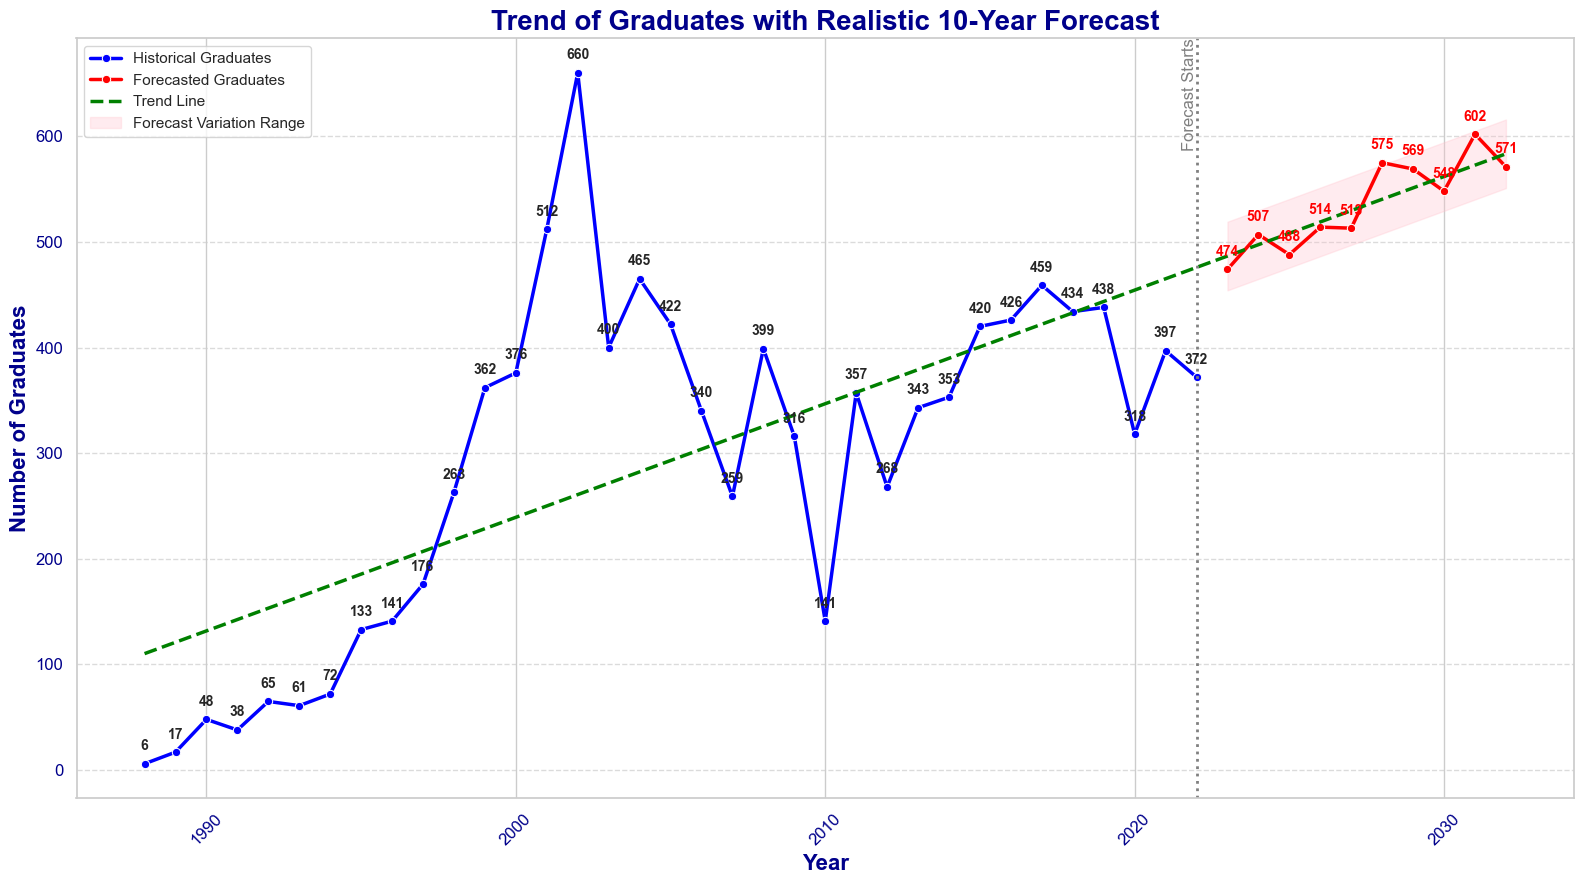

Año  Count  Forecast
0   1988      6     False
1   1989     17     False
2   1990     48     False
3   1991     38     False
4   1992     65     False
5   1993     61     False
6   1994     72     False
7   1995    133     False
8   1996    141     False
9   1997    176     False
10  1998    263     False
11  1999    362     False
12  2000    376     False
13  2001    512     False
14  2002    660     False
15  2003    400     False
16  2004    465     False
17  2005    422     False
18  2006    340     False
19  2007    259     False
20  2008    399     False
21  2009    316     False
22  2010    141     False
23  2011    357     False
24  2012    268     False
25  2013    343     False
26  2014    353     False
27  2015    420     False
28  2016    426     False
29  2017    459     False
30  2018    434     False
31  2019    438     False
32  2020    318     False
33  2021    397     False
34  2022    372     False
0   2023    474      True
1   2024    507      True
2   2025    488      True
3   2026    514      True
4   2027    513      True
5   2028    575      True
6   2029    569      True
7   2030    548      True
8   2031    602      True
9   2032    571      True

In [ ]:

def realistic_forecast_graduates(graduates_per_year):
    """
    Generate a more realistic forecast with variations

    Parameters:
    graduates_per_year (pandas.DataFrame): DataFrame with 'Año' and 'Count' columns

    Returns:
    pandas.DataFrame: Forecast for next 10 years with realistic variations
    """
    # Prepare data for linear regression
    X = graduates_per_year['Año'].values.reshape(-1, 1)
    y = graduates_per_year['Count'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Calculate standard deviation of historical data
    std_dev = np.std(y)

    # Generate forecast years
    last_year = graduates_per_year['Año'].max()
    forecast_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)

    # Predict base graduates for forecast years
    base_forecast = model.predict(forecast_years)

    # Add random variation with controlled standard deviation
    # Reduce the standard deviation to make variations more subtle
    variation_scale = 0.2  # Adjust this to control the amount of randomness
    random_variations = np.random.normal(
        loc=0,
        scale=std_dev * variation_scale,
        size=len(forecast_years)
    )

    # Apply variations to base forecast
    forecast_counts = base_forecast + random_variations

    # Ensure forecast counts are not negative
    forecast_counts = np.maximum(forecast_counts, 0)

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'Año': forecast_years.flatten(),
        'Count': np.round(forecast_counts).astype(int),
        'Forecast': True
    })

    # Combine historical and forecast data
    full_data = pd.concat([
        graduates_per_year.assign(Forecast=False),
        forecast_df
    ]).sort_values('Año')

    return full_data, model, std_dev

def plot_graduates_with_realistic_forecast(full_data, model, std_dev):
    """
    Plot graduates trend with realistic forecast

    Parameters:
    full_data (pandas.DataFrame): Combined historical and forecast data
    model (LinearRegression): Fitted linear regression model
    std_dev (float): Standard deviation of historical data
    """
    # Set the style
    sns.set_theme(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(16, 9))

    # Plot historical data
    historical_data = full_data[full_data['Forecast'] == False]
    forecast_data = full_data[full_data['Forecast'] == True]

    # Line plot for historical data
    sns.lineplot(data=historical_data, x='Año', y='Count', marker='o',
                 color='blue', linewidth=2.5, label='Historical Graduates')

    # Line plot for forecast data
    sns.lineplot(data=forecast_data, x='Año', y='Count', marker='o',
                 color='red', linewidth=2.5, label='Forecasted Graduates')

    # Add trend line for entire dataset (historical + forecast)
    X_trend = full_data['Año'].values.reshape(-1, 1)
    y_trend = model.predict(X_trend)
    plt.plot(full_data['Año'], y_trend, color='green', linestyle='--',
             linewidth=2.5, label='Trend Line')

    # Add confidence interval bands
    # Use standard deviation to create variation bands
    X_forecast = forecast_data['Año'].values.reshape(-1, 1)
    forecast_base = model.predict(X_forecast)

    # Create confidence interval
    confidence_interval = std_dev * 0.2  # Adjust multiplier to control band width
    plt.fill_between(
        forecast_data['Año'],
        forecast_base - confidence_interval,
        forecast_base + confidence_interval,
        color='pink',
        alpha=0.3,
        label='Forecast Variation Range'
    )

    # Add data point labels for historical data
    for index, row in historical_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add data point labels for forecast data
    for index, row in forecast_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

    # Customize the plot
    plt.title("Trend of Graduates with Realistic 10-Year Forecast", fontsize=20, fontweight='bold', color='darkblue')
    plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
    plt.ylabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
    plt.xticks(rotation=45, fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add vertical line to separate historical and forecast data
    last_historical_year = historical_data['Año'].max()
    plt.axvline(x=last_historical_year, color='gray', linestyle=':', linewidth=2)
    plt.text(last_historical_year, plt.gca().get_ylim()[1], 'Forecast Starts',
             rotation=90, va='top', ha='right', color='gray')

    # Add legend
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return full_data

# Example usage (uncommend and use with your data)
# graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')
# full_forecast_data, regression_model, std_dev = realistic_forecast_graduates(graduates_per_year)
# plot_graduates_with_realistic_forecast(full_forecast_data, regression_model, std_dev)

# Assuming consolidated_graduate_data exists
graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')

# Generate realistic forecast
full_forecast_data, regression_model, std_dev = realistic_forecast_graduates(graduates_per_year)

# Plot with realistic forecast
plot_graduates_with_realistic_forecast(full_forecast_data, regression_model, std_dev)

### Indicadores estadísticos

In [21]:
from IPython.display import display

# Statistical analysis for year
year_with_most_graduates = graduates_per_year.loc[graduates_per_year['Count'].idxmax(), 'Año']
year_with_least_graduates = graduates_per_year.loc[graduates_per_year['Count'].idxmin(), 'Año']
average_graduates_per_year = graduates_per_year['Count'].mean()
median_graduates_per_year = graduates_per_year['Count'].median()
std_dev_graduates_per_year = graduates_per_year['Count'].std()
max_graduates_per_year = graduates_per_year['Count'].max()
min_graduates_per_year = graduates_per_year['Count'].min()
sum_graduates_per_year = graduates_per_year['Count'].sum()
count_years = graduates_per_year['Año'].count()

# Table for statistical analysis
statistical_summary_year = pd.DataFrame({
    'Year with Most Graduates': [year_with_most_graduates],
    'Year with Least Graduates': [year_with_least_graduates],
    'Average Graduates per Year': [average_graduates_per_year],
    'Median Graduates per Year': [median_graduates_per_year],
    'Standard Deviation': [std_dev_graduates_per_year],
    'Max Graduates per Year': [max_graduates_per_year],
    'Min Graduates per Year': [min_graduates_per_year],
    'Total Graduates': [sum_graduates_per_year],
    'Number of Years': [count_years]
})

print("Statistical Summary for Graduates per Year:")
display(statistical_summary_year)

# Additional descriptive statistics
descriptive_stats_year = graduates_per_year['Count'].describe()
print("\nDescriptive Statistics for Graduates per Year:")
display(descriptive_stats_year.to_frame().T)
# Additional indicators
range_graduates_per_year = graduates_per_year['Count'].max() - graduates_per_year['Count'].min()
variance_graduates_per_year = graduates_per_year['Count'].var()
skewness_graduates_per_year = graduates_per_year['Count'].skew()
kurtosis_graduates_per_year = graduates_per_year['Count'].kurtosis()
mode_graduates_per_year = graduates_per_year['Count'].mode().values[0]

# Add additional indicators to the summary table
additional_indicators = pd.DataFrame({
    'Range of Graduates per Year': [range_graduates_per_year],
    'Variance of Graduates per Year': [variance_graduates_per_year],
    'Skewness of Graduates per Year': [skewness_graduates_per_year],
    'Kurtosis of Graduates per Year': [kurtosis_graduates_per_year],
    'Mode of Graduates per Year': [mode_graduates_per_year]
})

# Combine with the existing summary
statistical_summary_year = pd.concat([statistical_summary_year, additional_indicators], axis=1)

print("\nUpdated Statistical Summary for Graduates per Year with Additional Indicators:")
display(statistical_summary_year)

Statistical Summary for Graduates per Year:


Year with Most Graduates  Year with Least Graduates  \
0                      2002                       1988   

   Average Graduates per Year  Median Graduates per Year  Standard Deviation  \
0                  293.057143                      343.0          164.721502   

   Max Graduates per Year  Min Graduates per Year  Total Graduates  \
0                     660                       6            10257   

   Number of Years  
0               35


Descriptive Statistics for Graduates per Year:


count        mean         std  min    25%    50%    75%    max
Count   35.0  293.057143  164.721502  6.0  141.0  343.0  410.0  660.0


Updated Statistical Summary for Graduates per Year with Additional Indicators:


Year with Most Graduates  Year with Least Graduates  \
0                      2002                       1988   

   Average Graduates per Year  Median Graduates per Year  Standard Deviation  \
0                  293.057143                      343.0          164.721502   

   Max Graduates per Year  Min Graduates per Year  Total Graduates  \
0                     660                       6            10257   

   Number of Years  Range of Graduates per Year  \
0               35                          654   

   Variance of Graduates per Year  Skewness of Graduates per Year  \
0                    27133.173109                       -0.253921   

   Kurtosis of Graduates per Year  Mode of Graduates per Year  
0                       -0.680811                         141

In [22]:
# Statistical analysis for careers
graduates_per_career = consolidated_graduate_data["Carrera"].value_counts()
career_with_most_graduates = graduates_per_career.idxmax()
career_with_least_graduates = graduates_per_career.idxmin()
average_graduates_per_career = graduates_per_career.mean()
median_graduates_per_career = graduates_per_career.median()
std_dev_graduates_per_career = graduates_per_career.std()
max_graduates_per_career = graduates_per_career.max()
min_graduates_per_career = graduates_per_career.min()
sum_graduates_per_career = graduates_per_career.sum()
count_careers = graduates_per_career.count()

# Table for statistical analysis
statistical_summary_career = pd.DataFrame({
    'Career with Most Graduates': [career_with_most_graduates],
    'Career with Least Graduates': [career_with_least_graduates],
    'Average Graduates per Career': [average_graduates_per_career],
    'Median Graduates per Career': [median_graduates_per_career],
    'Standard Deviation': [std_dev_graduates_per_career],
    'Max Graduates per Career': [max_graduates_per_career],
    'Min Graduates per Career': [min_graduates_per_career],
    'Total Graduates': [sum_graduates_per_career],
    'Number of Careers': [count_careers]
})

print("\nStatistical Summary for Graduates per Career:")
display(statistical_summary_career)


Statistical Summary for Graduates per Career:


Career with Most Graduates Career with Least Graduates  \
0       Ingeniería Comercial              Construcciones   

   Average Graduates per Career  Median Graduates per Career  \
0                    353.689655                        201.0   

   Standard Deviation  Max Graduates per Career  Min Graduates per Career  \
0          405.090475                      1477                         7   

   Total Graduates  Number of Careers  
0            10257                 29

In [23]:
# Statistical analysis for faculties
graduates_per_faculty = consolidated_graduate_data["Facultad"].value_counts()
faculty_with_most_graduates = graduates_per_faculty.idxmax()
faculty_with_least_graduates = graduates_per_faculty.idxmin()
average_graduates_per_faculty = graduates_per_faculty.mean()
median_graduates_per_faculty = graduates_per_faculty.median()
std_dev_graduates_per_faculty = graduates_per_faculty.std()
max_graduates_per_faculty = graduates_per_faculty.max()
min_graduates_per_faculty = graduates_per_faculty.min()
sum_graduates_per_faculty = graduates_per_faculty.sum()
count_faculties = graduates_per_faculty.count()

# Table for statistical analysis
statistical_summary_faculty = pd.DataFrame({
    'Faculty with Most Graduates': [faculty_with_most_graduates],
    'Faculty with Least Graduates': [faculty_with_least_graduates],
    'Average Graduates per Faculty': [average_graduates_per_faculty],
    'Median Graduates per Faculty': [median_graduates_per_faculty],
    'Standard Deviation': [std_dev_graduates_per_faculty],
    'Max Graduates per Faculty': [max_graduates_per_faculty],
    'Min Graduates per Faculty': [min_graduates_per_faculty],
    'Total Graduates': [sum_graduates_per_faculty],
    'Number of Faculties': [count_faculties]
})

print("\nStatistical Summary for Graduates per Faculty:")
display(statistical_summary_faculty)


Statistical Summary for Graduates per Faculty:


Faculty with Most Graduates   Faculty with Least Graduates  \
0      Ciencias Empresariales  Ciencias Jurídicas Y Sociales   

   Average Graduates per Faculty  Median Graduates per Faculty  \
0                         2051.4                        1690.0   

   Standard Deviation  Max Graduates per Faculty  Min Graduates per Faculty  \
0          1215.67545                       4142                       1152   

   Total Graduates  Number of Faculties  
0            10257                    5

In [24]:
# Statistical analysis for defense date
graduates_per_date = consolidated_graduate_data["Fecha Defensa"].dt.date.value_counts()
date_with_most_graduates = graduates_per_date.idxmax()
date_with_least_graduates = graduates_per_date.idxmin()
average_graduates_per_date = graduates_per_date.mean()
median_graduates_per_date = graduates_per_date.median()
std_dev_graduates_per_date = graduates_per_date.std()
max_graduates_per_date = graduates_per_date.max()
min_graduates_per_date = graduates_per_date.min()
sum_graduates_per_date = graduates_per_date.sum()
count_dates = graduates_per_date.count()

# Table for statistical analysis
statistical_summary_date = pd.DataFrame({
    'Date with Most Graduates': [date_with_most_graduates],
    'Date with Least Graduates': [date_with_least_graduates],
    'Average Graduates per Date': [average_graduates_per_date],
    'Median Graduates per Date': [median_graduates_per_date],
    'Standard Deviation': [std_dev_graduates_per_date],
    'Max Graduates per Date': [max_graduates_per_date],
    'Min Graduates per Date': [min_graduates_per_date],
    'Total Graduates': [sum_graduates_per_date],
    'Number of Dates': [count_dates]
})

print("\nStatistical Summary for Graduates per Defense Date:")
display(statistical_summary_date)


Statistical Summary for Graduates per Defense Date:


Date with Most Graduates Date with Least Graduates  \
0               2017-12-14                2022-05-11   

   Average Graduates per Date  Median Graduates per Date  Standard Deviation  \
0                    3.387384                        2.0           11.764013   

   Max Graduates per Date  Min Graduates per Date  Total Graduates  \
0                     459                       1            10257   

   Number of Dates  
0             3028

In [25]:
# Statistical analysis for names
graduates_per_name = consolidated_graduate_data["Nombre"].value_counts()
name_with_most_graduates = graduates_per_name.idxmax()
name_with_least_graduates = graduates_per_name.idxmin()
average_graduates_per_name = graduates_per_name.mean()
median_graduates_per_name = graduates_per_name.median()
std_dev_graduates_per_name = graduates_per_name.std()
max_graduates_per_name = graduates_per_name.max()
min_graduates_per_name = graduates_per_name.min()
sum_graduates_per_name = graduates_per_name.sum()
count_names = graduates_per_name.count()

# Table for statistical analysis
statistical_summary_name = pd.DataFrame({
    'Name with Most Graduates': [name_with_most_graduates],
    'Name with Least Graduates': [name_with_least_graduates],
    'Average Graduates per Name': [average_graduates_per_name],
    'Median Graduates per Name': [median_graduates_per_name],
    'Standard Deviation': [std_dev_graduates_per_name],
    'Max Graduates per Name': [max_graduates_per_name],
    'Min Graduates per Name': [min_graduates_per_name],
    'Total Graduates': [sum_graduates_per_name],
    'Number of Names': [count_names]
})

print("\nStatistical Summary for Graduates per Name:")
display(statistical_summary_name)


Statistical Summary for Graduates per Name:


Name with Most Graduates             Name with Least Graduates  \
0  CUÉLLAR ASSAF FRANCO HANS  Vélez Ocampo Medeiros Kathia Valeria   

   Average Graduates per Name  Median Graduates per Name  Standard Deviation  \
0                     1.01104                        1.0            0.108202   

   Max Graduates per Name  Min Graduates per Name  Total Graduates  \
0                       3                       1            10257   

   Number of Names  
0            10145

## Gráficos y visualizaciones extras

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_11648\2897485702.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")


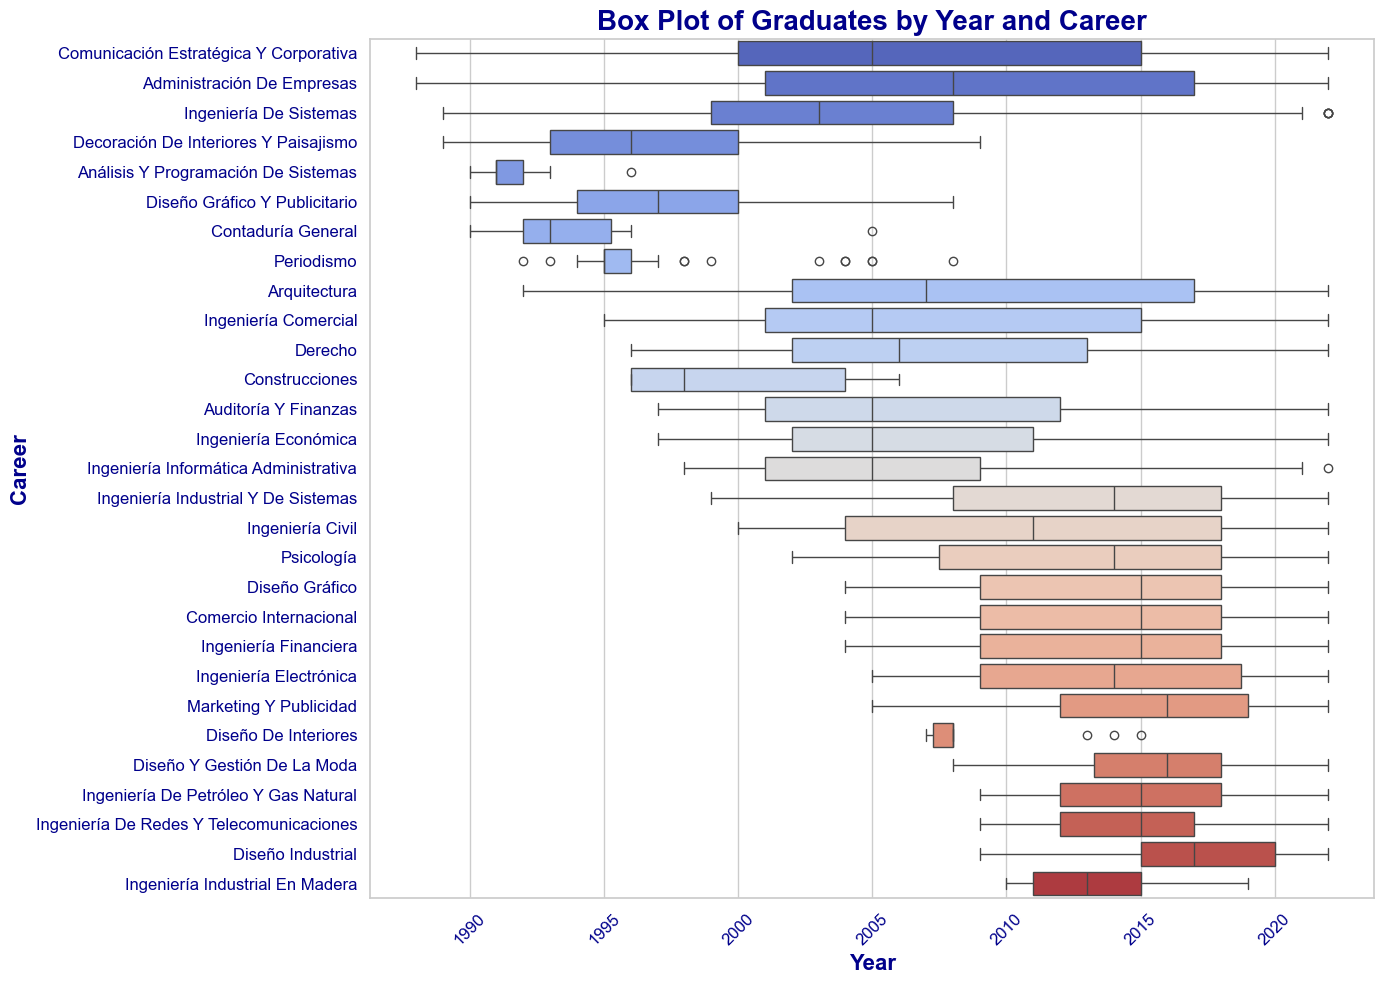

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_11648\2897485702.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")


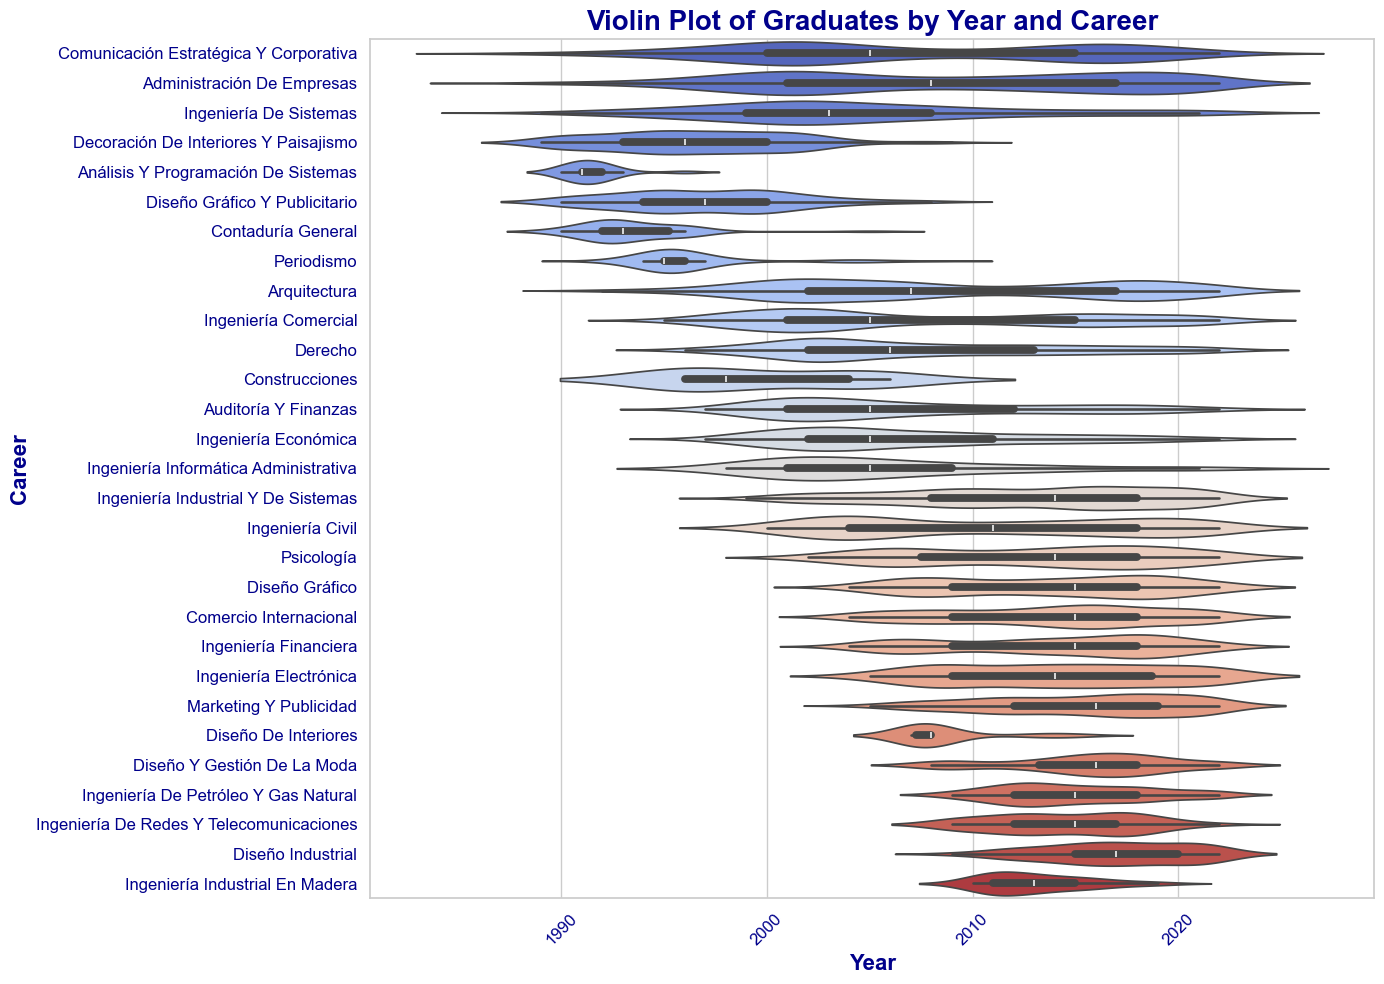

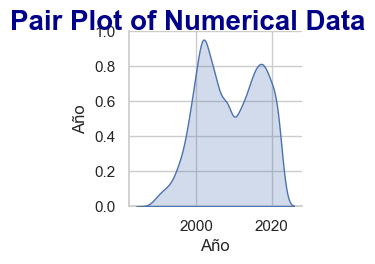

In [26]:
# Assuming consolidated_graduate_data is already loaded and cleaned

# Set the style
sns.set_theme(style="whitegrid")

# Box Plot for the distribution of graduates by year and career
plt.figure(figsize=(14, 10))
sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")
plt.title("Box Plot of Graduates by Year and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

# Violin Plot for the distribution and density of graduates by year and career
plt.figure(figsize=(14, 10))
sns.violinplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")
plt.title("Violin Plot of Graduates by Year and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

# Pair Plot for pairwise relationships in the dataset
# For this, we need to select numerical columns only
numerical_data = consolidated_graduate_data[["Año"]]
sns.pairplot(numerical_data, diag_kind="kde", plot_kws={"s": 50, "alpha": 0.5})
plt.suptitle("Pair Plot of Numerical Data", fontsize=20, fontweight='bold', color='darkblue', y=1.02)
plt.show()

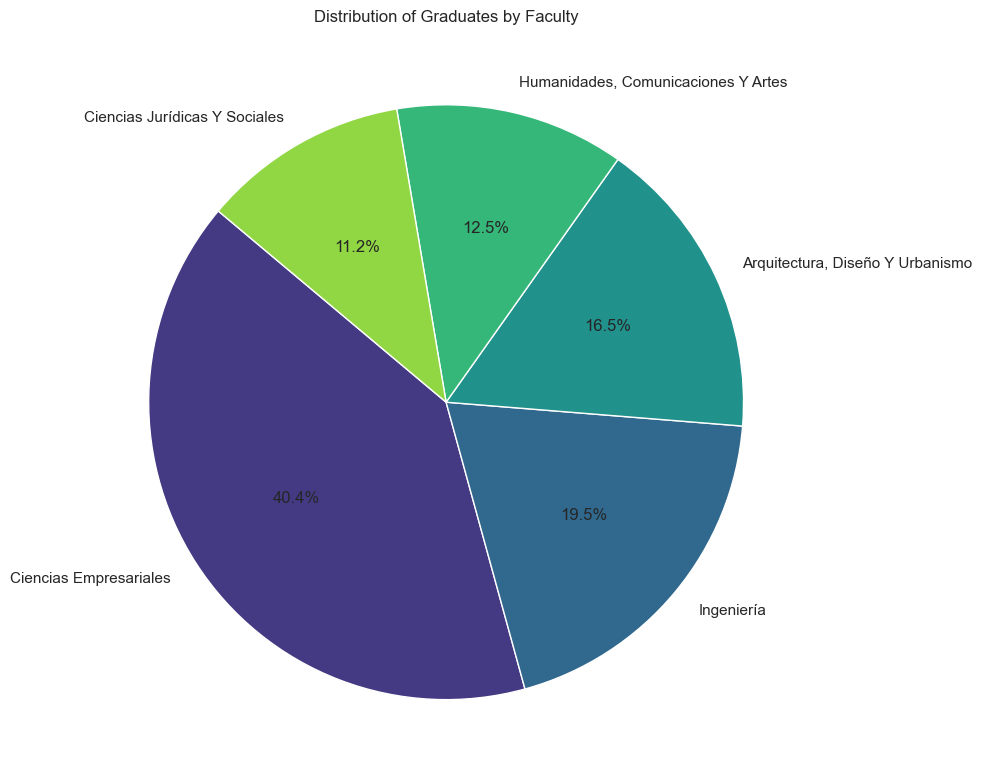

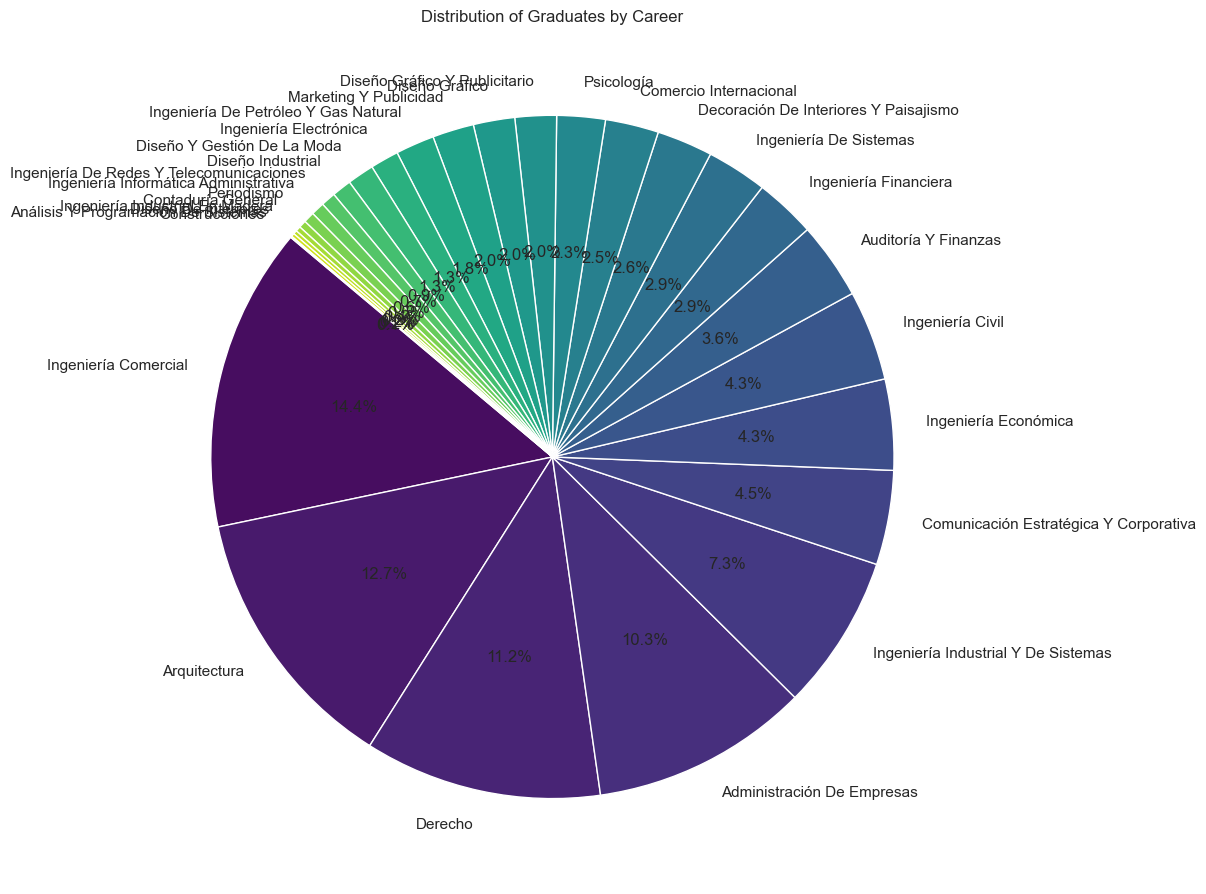

In [27]:
# Pie chart for the distribution of graduates by faculty
plt.figure(figsize=(10, 8))
graduates_per_faculty.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(graduates_per_faculty)))
plt.title("Distribution of Graduates by Faculty")
plt.ylabel('')
plt.tight_layout()
plt.show()

career_counts = consolidated_graduate_data["Carrera"].value_counts()

# Pie chart for the distribution of graduates by career
plt.figure(figsize=(12, 12))
career_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(career_counts)))
plt.title("Distribution of Graduates by Career")
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_11648\2894108174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Año", y="Facultad", data=consolidated_graduate_data, palette="viridis")


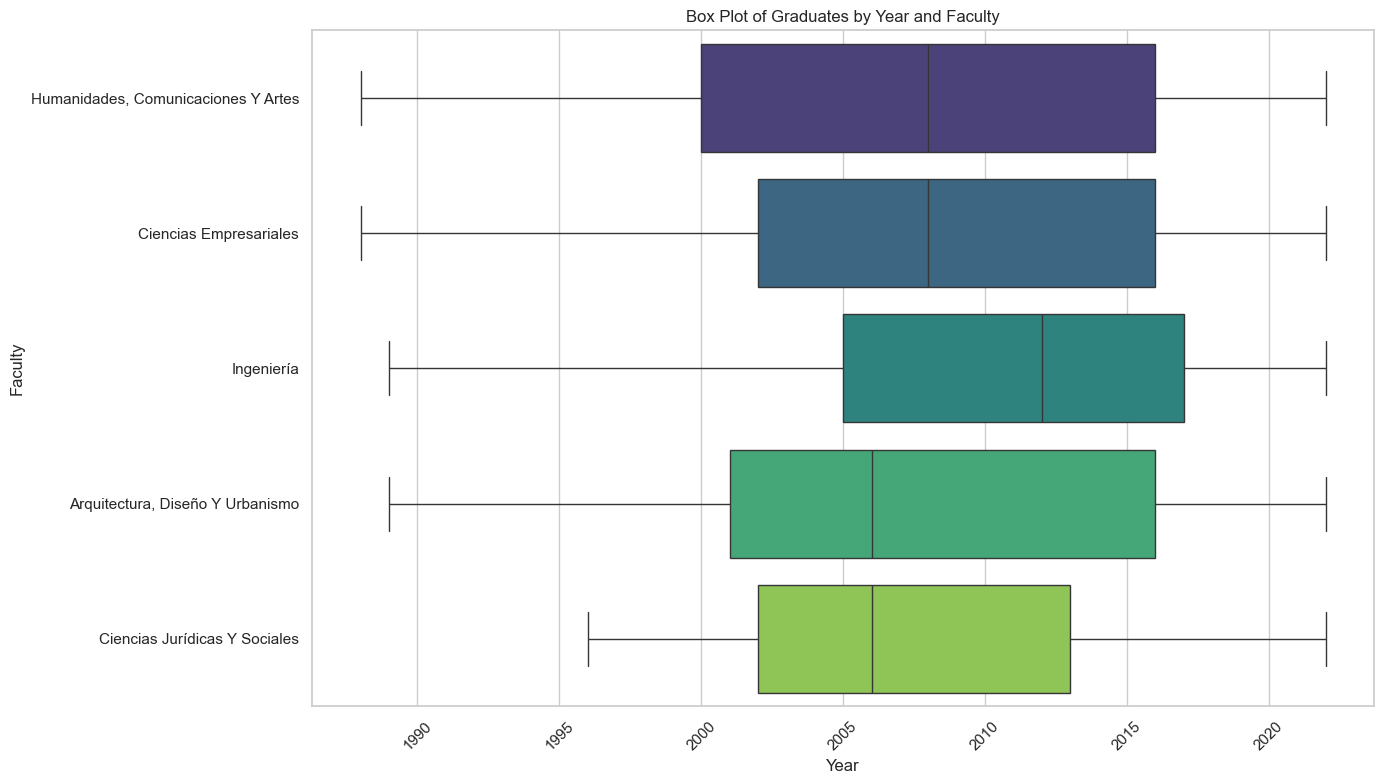

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_11648\2894108174.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="viridis")


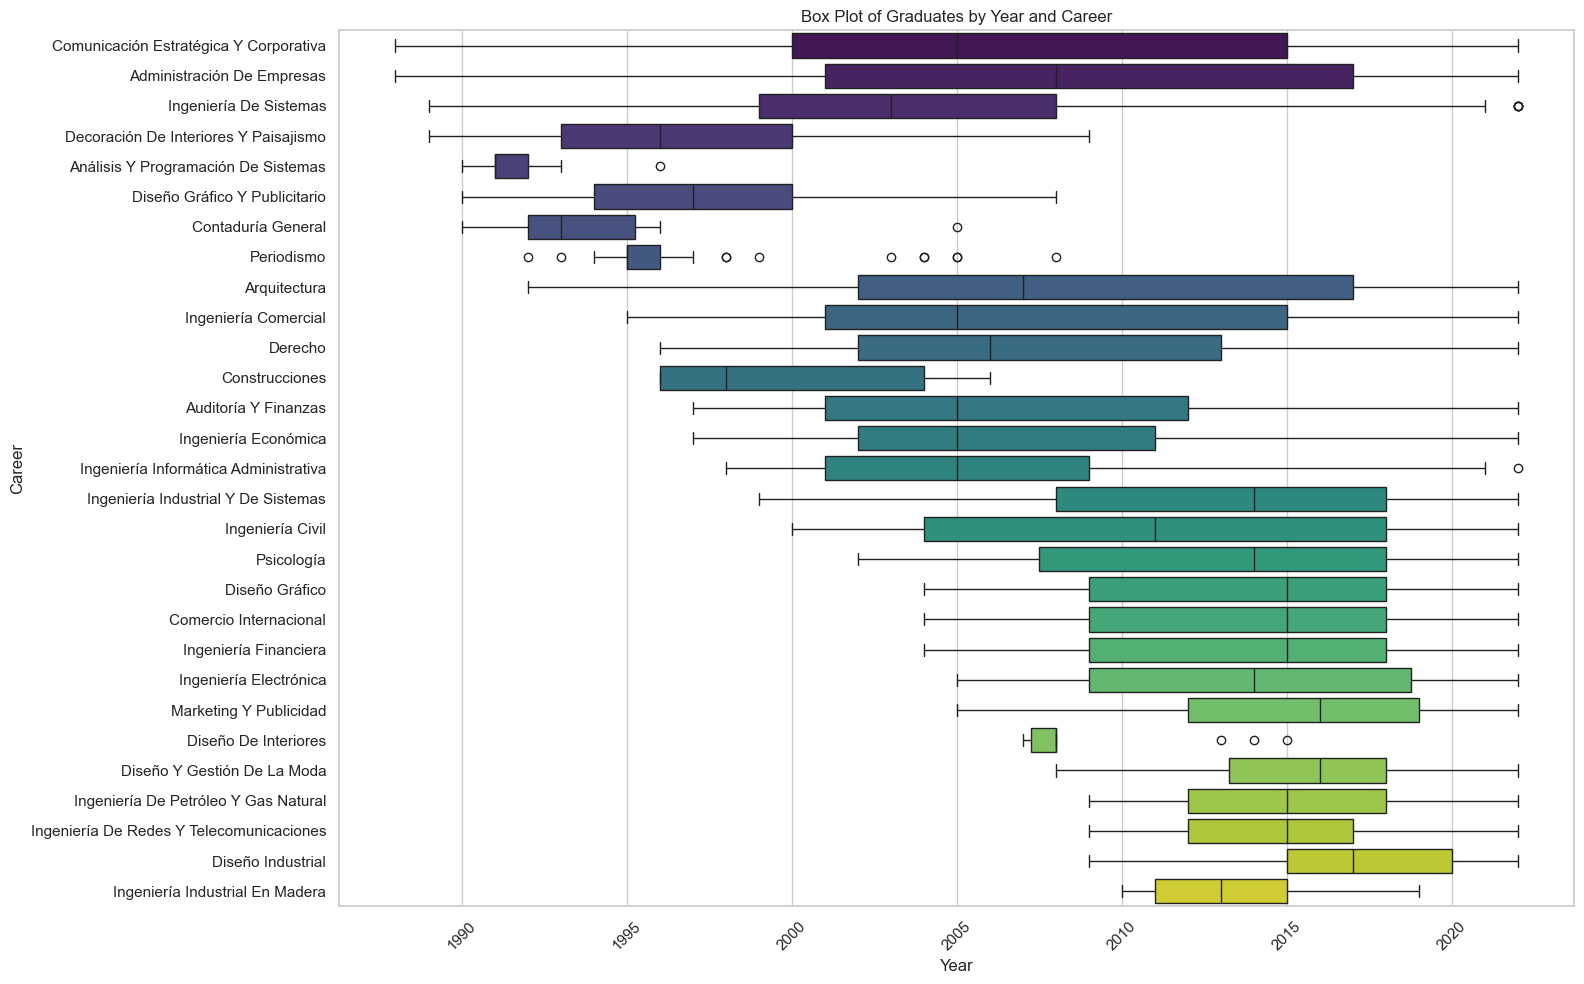

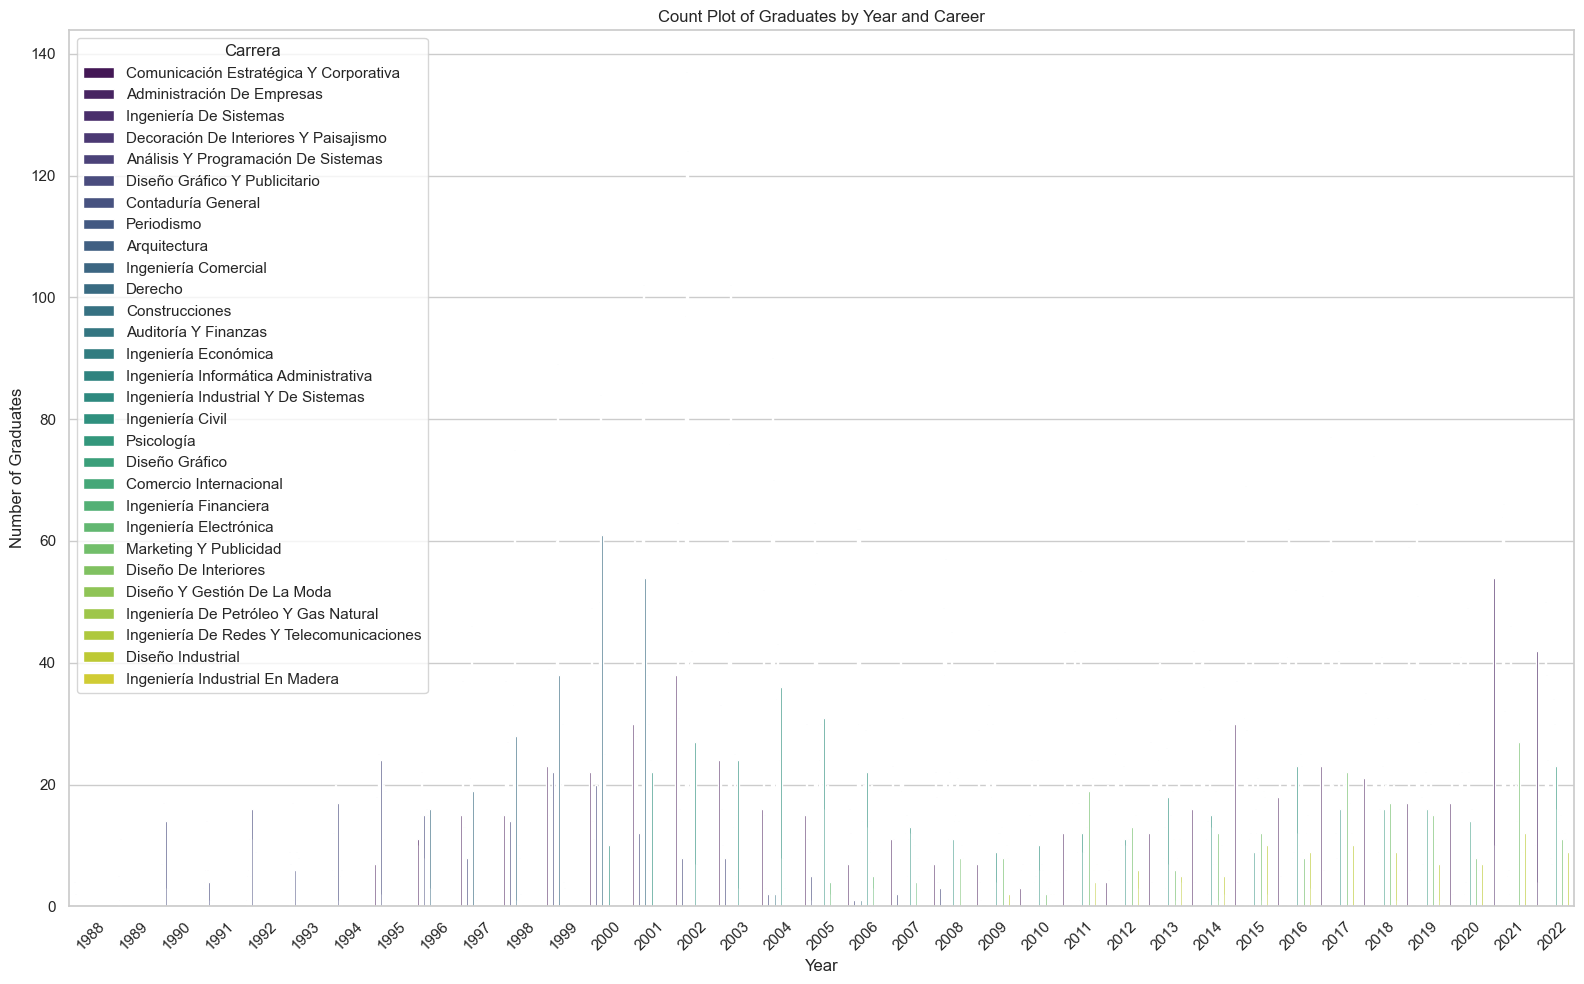

In [28]:
# Box plot for the distribution of graduates by year and faculty
plt.figure(figsize=(14, 8))
sns.boxplot(x="Año", y="Facultad", data=consolidated_graduate_data, palette="viridis")
plt.title("Box Plot of Graduates by Year and Faculty")
plt.xlabel("Year")
plt.ylabel("Faculty")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot for the distribution of graduates by year and career
plt.figure(figsize=(16, 10))
sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="viridis")
plt.title("Box Plot of Graduates by Year and Career")
plt.xlabel("Year")
plt.ylabel("Career")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count plot for the number of graduates by year and career
plt.figure(figsize=(16, 10))
sns.countplot(x="Año", hue="Carrera", data=consolidated_graduate_data, palette="viridis")
plt.title("Count Plot of Graduates by Year and Career")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()